### Used BMW Car Sales: Data Preprocesing, EDA, Feature Engineering and Prediction Model





In [466]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [467]:
#from google.colab import drive
#drive.mount('/content/drive')

In [468]:
#pip install chardet

In [469]:
import chardet

# Detect the dataset configuration before importing it.
with open("./bmw_pricing_v3.csv", 'rb') as f:
    result = chardet.detect(f.read())
result


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [470]:
#import data
#df_bmw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Entregable 1_Limpieza de Datos/bmw_pricing_v3.csv")
df_bmw = pd.read_csv("./bmw_pricing_v3.csv", encoding='utf-8')

## Preliminary Analysis and Data Cleaning


### 1.1 Dataset Structure, Statistics, Null Percentage, Duplicates, Data Types per Column

In [471]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [472]:
# Column data types and structure: dates are strings, not datetime objects. There are 4,843 entries. There are many nulls. 
# There are columns with Dtype = object that are actually booleans.
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [473]:
# Null values per column
df_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [474]:
# Descriptive statistics for numeric variables, including percentiles. Observations:
# Minimum horsepower = 0, maximum kilometers > 1,000,000. Maximum price 178,500, far above the 90th percentile, which is 25,800.
df_bmw.describe([x*0.1 for x in range(10)])

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
0%,-6.400000e+01,0.000000,100.000000
10%,6.500800e+04,85.000000,7400.000000
20%,9.252700e+04,100.000000,10100.000000
30%,1.111400e+05,105.000000,11500.000000
40%,1.264230e+05,120.000000,12900.000000
50%,1.410800e+05,120.000000,14200.000000


In [475]:
# Checking for duplicates: there are none.
len(df_bmw[df_bmw.duplicated()].index)

0

In [476]:
# Converting dates to datetime
for i in ["fecha_registro","fecha_venta"]:
    df_bmw[i] = pd.to_datetime(df_bmw[i])

In [477]:
# Number of unique values in 'volante_regulable'
df_bmw["volante_regulable"].nunique()

2

In [478]:
# Converting "false categorical columns" (with only True or False) into booleans.
# First, I create a list with all such columns.
l_falsas_categoricas = []
for i in df_bmw:
  if df_bmw[i].dtype.kind == "O" and  df_bmw[i].nunique() == 2 :
    l_falsas_categoricas.append(i)

l_falsas_categoricas

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [479]:
# Convert these columns to booleans.
df_bmw[l_falsas_categoricas] = df_bmw[l_falsas_categoricas].astype("bool")
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4843 non-null   bool          
 9   aire_acondicionado           4843 non-null   bool          
 10  camara_trasera               4843 non-null   bool          
 11  asientos_traseros_plegables  4843 non-null 

In [480]:
# Create a copy of the dataset
df_bmw1 = df_bmw.copy()

In [481]:
df_bmw1["fecha_registro"].dt.year

0       2012.0
1          NaN
2       2012.0
3          NaN
4          NaN
         ...  
4838       NaN
4839    2015.0
4840    2015.0
4841    2016.0
4842       NaN
Name: fecha_registro, Length: 4843, dtype: float64

In [482]:
# Extract the year from registration and sale dates as a new column; the full date isn't necessary.
for col in ['fecha_registro', 'fecha_venta']:
    df_bmw1[col+ "_year"] = df_bmw1[col].dt.year

df_bmw1.head()


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_year,fecha_venta_year
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,True,True,True,True,11300.0,2018-01-01,2012.0,2018.0
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,True,False,True,True,True,69700.0,2018-02-01,NaN,2018.0
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,True,False,True,False,10200.0,2018-02-01,2012.0,2018.0
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,True,True,True,True,True,25100.0,2018-02-01,NaN,2018.0
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaN,2018.0


In [483]:
# Count of null values per column
df_bmw1.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            6
fecha_venta                       1
fecha_registro_year            2423
fecha_venta_year                  1
dtype: int64

In [484]:
# Percentage of nulls per column
df_bmw1.isnull().sum()/df_bmw.shape[0]*100

marca                          20.028908
modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.000000
aire_acondicionado              0.000000
camara_trasera                  0.000000
asientos_traseros_plegables     0.000000
elevalunas_electrico            0.000000
bluetooth                       0.000000
gps                             0.000000
alerta_lim_velocidad            0.000000
precio                          0.123890
fecha_venta                     0.020648
fecha_registro_year            50.030973
fecha_venta_year                0.020648
dtype: float64

In [485]:
# Drop the 'marca' column because all cars are BMW, so it provides no useful information.
# Drop 'fecha_registro' and 'fecha_venta' because we kept the years in separate columns ('fecha_registro_year' and 'fecha_venta_year').
# Keep all other columns for now; they might provide useful information.
df_bmw1.drop(["marca", "fecha_registro", "fecha_venta"], axis = 1, inplace = True)

In [486]:
df_bmw2 = df_bmw1.copy()

###    1.2   Preliminary Univariate Analysis: Unique Values, Numeric Variable Distributions

In [487]:
# Checking data types: numeric, boolean, categorical.
df_bmw2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   tipo_gasolina                4838 non-null   object 
 4   color                        4398 non-null   object 
 5   tipo_coche                   3383 non-null   object 
 6   volante_regulable            4843 non-null   bool   
 7   aire_acondicionado           4843 non-null   bool   
 8   camara_trasera               4843 non-null   bool   
 9   asientos_traseros_plegables  4843 non-null   bool   
 10  elevalunas_electrico         4843 non-null   bool   
 11  bluetooth                    4843 non-null   bool   
 12  gps                          4843 non-null   bool   
 13  alerta_lim_velocid

In [488]:
print("dtype.kind bool: ", df_bmw2["gps"].dtype.kind, "\n", "dtype.kind object: ",  df_bmw2["modelo"].dtype.kind, "\n", "dtype.kind float64: ", df_bmw2["precio"].dtype.kind)

dtype.kind bool:  b 
 dtype.kind object:  O 
 dtype.kind float64:  f


In [489]:
# Separate variables into lists by type
target = ['precio']

def obtener_lista_variables(dataset):
  lista_numericas = []
  lista_boolean = []
  lista_categoricas = []

  for i in dataset:
    if (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and len(dataset[i].unique()) != 2 and i not in target:
      lista_numericas.append(i)
    elif (dataset[i].dtype.kind == "b" or ( dataset[i].dtype.kind == "i" and len(dataset[i].unique()) == 2 ) or ( dataset[i].dtype.kind == "u" and len(dataset[i].unique()) == 2 )) and  i not in target:
      lista_boolean.append(i)
    elif dataset[i].dtype.kind == "O" and i not in target:
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas


In [490]:
l_num2, l_bool2, l_cat2 = obtener_lista_variables(df_bmw2)

In [491]:
l_num2

['km', 'potencia', 'fecha_registro_year', 'fecha_venta_year']

In [492]:
l_cat2

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [493]:
l_bool2

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [494]:
# Convert boolean columns to numeric
df_bmw2[l_bool2] = df_bmw[l_bool2].astype("uint8")

df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   tipo_gasolina                4838 non-null   object 
 4   color                        4398 non-null   object 
 5   tipo_coche                   3383 non-null   object 
 6   volante_regulable            4843 non-null   uint8  
 7   aire_acondicionado           4843 non-null   uint8  
 8   camara_trasera               4843 non-null   uint8  
 9   asientos_traseros_plegables  4843 non-null   uint8  
 10  elevalunas_electrico         4843 non-null   uint8  
 11  bluetooth                    4843 non-null   uint8  
 12  gps                          4843 non-null   uint8  
 13  alerta_lim_velocid

In [495]:
# Value counts for categorical variables:
# - 'modelo': 76 types. Some models have only one record. Should we reduce categories or eliminate models with few records?
# - 'tipo_gasolina': 96% are diesel. The dataset is not suitable for gasoline car predictions. Remove non-diesel entries and drop the column.
# - 'color': Most cars are black or gray. Group red, beige, green, and orange together?
# - 'tipo_coche': No issues observed for now.

for i in l_cat2:
  print(df_bmw1[i].value_counts(normalize = True))

modelo
320                0.155372
520                0.130785
318                0.117355
X3                 0.090496
116                0.073967
                     ...   
M135               0.000207
225                0.000207
i8                 0.000207
630                0.000207
214 Gran Tourer    0.000207
Name: proportion, Length: 76, dtype: float64
tipo_gasolina
diesel           0.957214
petrol           0.039479
hybrid_petrol    0.001654
Diesel           0.001033
electro          0.000620
Name: proportion, dtype: float64
color
black     0.340837
grey      0.243292
blue      0.147112
white     0.110050
brown     0.068668
silver    0.066394
red       0.010687
beige     0.008413
green     0.003183
orange    0.001364
Name: proportion, dtype: float64
tipo_coche
estate         0.327224
sedan          0.242684
suv            0.223175
hatchback      0.144251
subcompact     0.022761
coupe          0.022465
convertible    0.008868
van            0.008572
Name: proportion, dtype: float6

In [496]:
# Standardize fuel type capitalization: change 'Diesel' to 'diesel.'
df_bmw2.loc[df_bmw2.tipo_gasolina == "Diesel", "tipo_gasolina"] = "diesel"
df_bmw2.tipo_gasolina.value_counts(normalize = True)

tipo_gasolina
diesel           0.958247
petrol           0.039479
hybrid_petrol    0.001654
electro          0.000620
Name: proportion, dtype: float64

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'fecha_registro_year'}>]]
[[<Axes: title={'center': 'fecha_venta_year'}>]]
[[<Axes: title={'center': 'volante_regulable'}>]]
[[<Axes: title={'center': 'aire_acondicionado'}>]]
[[<Axes: title={'center': 'camara_trasera'}>]]
[[<Axes: title={'center': 'asientos_traseros_plegables'}>]]
[[<Axes: title={'center': 'elevalunas_electrico'}>]]
[[<Axes: title={'center': 'bluetooth'}>]]
[[<Axes: title={'center': 'gps'}>]]
[[<Axes: title={'center': 'alerta_lim_velocidad'}>]]


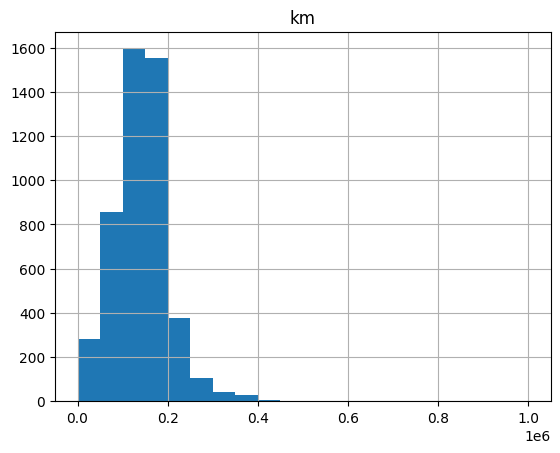

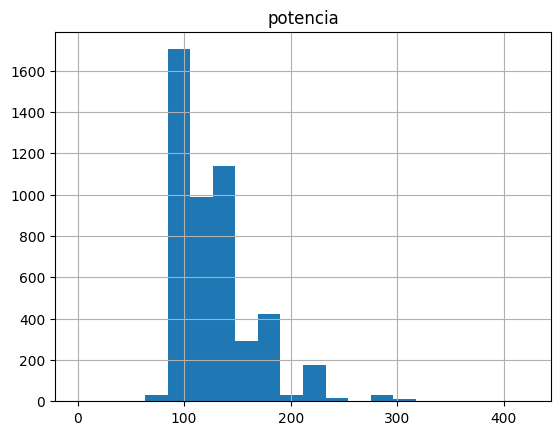

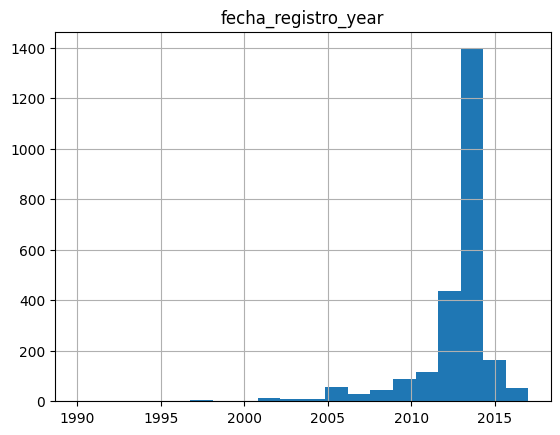

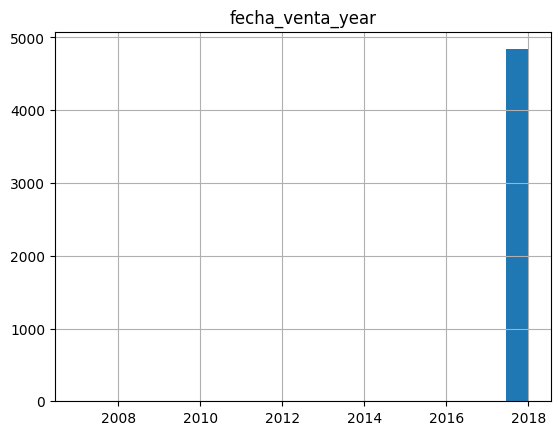

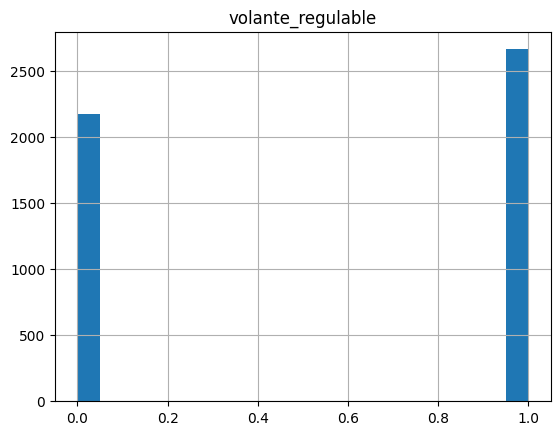

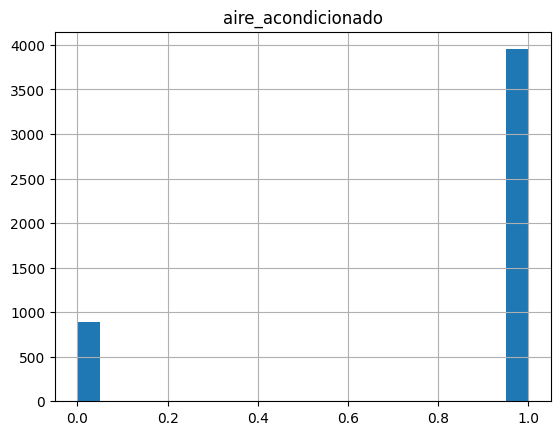

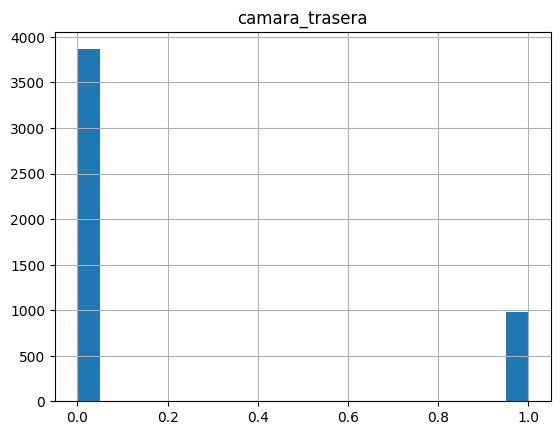

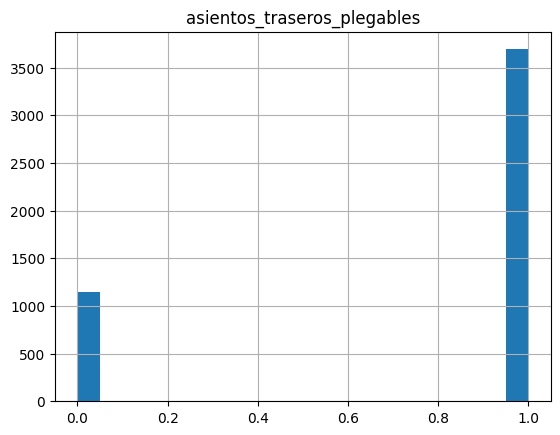

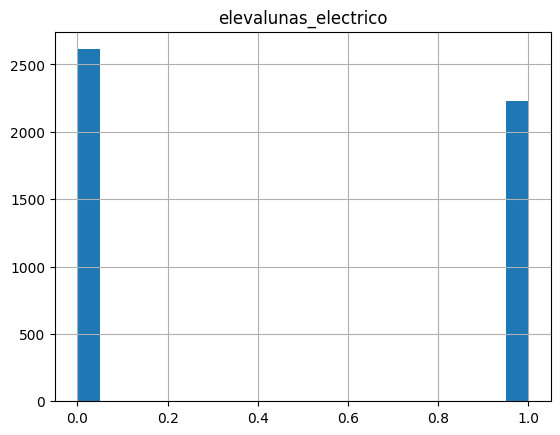

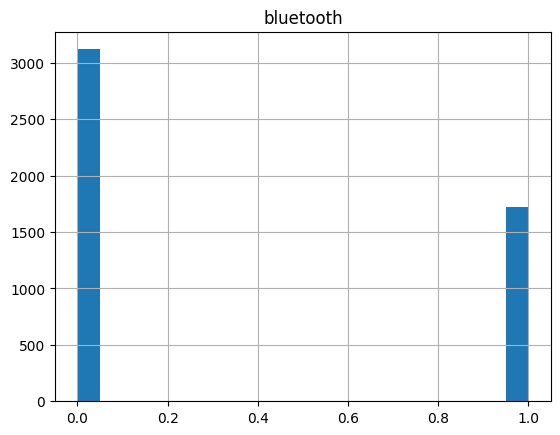

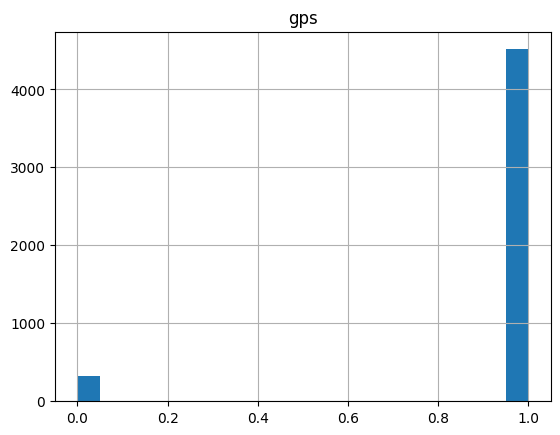

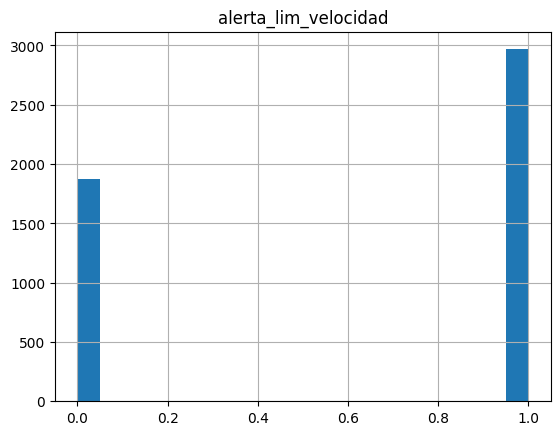

In [497]:

# Histogram analysis for numeric and boolean variables:

for i in l_num2 + l_bool2:
  print(df_bmw2.hist([i], bins = 20))

#### Conclusions: 

**Kilometers traveled (km)**
- There are cars with very high mileage and others with very low mileage.
- **Pending action**: Check for potential outliers.

2. **Power**
- There are negative power values.
- **Pending action**: Remove these records.

3. **Registration date**
- Many cars were registered in the same year.
- **Pending action**: Investigate this further.

4. **Sale date**
- All sales occurred in 2018.
- **Pending action**: Once the car’s age is calculated, this column can be removed.

5. **Adjustable steering wheel**
- Well distributed.

6. **Air conditioning**
- Slightly imbalanced.

7. **Rear camera**
- Slightly imbalanced.

8. **Electric windows**
- Well distributed.

9. **Bluetooth**
- Well distributed.

10. **GPS**
- Very imbalanced.
- **Pending action**: Perform a correlation analysis; if it shows little relation to the price, remove it.

11. **Speed limit alert**
- Well distributed.

### 1.3 Preliminary Analysis: Relationships Between Variables

In [498]:
# Correlation analysis:
# - Variables most correlated with price are 'km,' 'potencia,' and 'fecha_registro_year.'
corr = df_bmw2.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_year,fecha_venta_year
km,1.000000,-0.050141,0.066288,0.014837,0.003677,-0.031002,0.046708,-0.011877,0.154815,-0.037927,-0.410189,-0.483464,-0.032405
potencia,-0.050141,1.000000,0.327076,0.181692,0.312200,0.117561,0.342270,0.188742,0.008862,0.424401,0.639254,0.092517,-0.001708
volante_regulable,0.066288,0.327076,1.000000,0.285946,0.253305,0.057610,0.278864,0.108333,0.244320,0.189316,0.268103,-0.055196,-0.000129
aire_acondicionado,0.014837,0.181692,0.285946,1.000000,0.143668,0.041547,0.258524,0.102942,0.343792,0.172408,0.224283,0.206669,-0.013561
camara_trasera,0.003677,0.312200,0.253305,0.143668,1.000000,0.045274,0.200120,0.126171,0.062333,0.167858,0.251185,-0.024786,0.014367
asientos_traseros_plegables,-0.031002,0.117561,0.057610,0.041547,0.045274,1.000000,0.067916,0.014568,0.030617,0.093413,0.116591,0.038543,-0.015938
elevalunas_electrico,0.046708,0.342270,0.278864,0.258524,0.200120,0.067916,1.000000,0.204884,0.203410,0.299991,0.262155,0.091673,-0.002248
bluetooth,-0.011877,0.188742,0.108333,0.102942,0.126171,0.014568,0.204884,1.000000,0.106455,0.087168,0.173175,0.031140,0.021234
gps,0.154815,0.008862,0.244320,0.343792,0.062333,0.030617,0.203410,0.106455,1.000000,-0.052854,-0.005227,-0.077771,-0.007710
alerta_lim_velocidad,-0.037927,0.424401,0.189316,0.172408,0.167858,0.093413,0.299991,0.087168,-0.052854,1.000000,0.384376,0.144045,-0.007274


In [499]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   tipo_gasolina                4838 non-null   object 
 4   color                        4398 non-null   object 
 5   tipo_coche                   3383 non-null   object 
 6   volante_regulable            4843 non-null   uint8  
 7   aire_acondicionado           4843 non-null   uint8  
 8   camara_trasera               4843 non-null   uint8  
 9   asientos_traseros_plegables  4843 non-null   uint8  
 10  elevalunas_electrico         4843 non-null   uint8  
 11  bluetooth                    4843 non-null   uint8  
 12  gps                          4843 non-null   uint8  
 13  alerta_lim_velocid

C:\Users\mirei\AppData\Local\Temp\ipykernel_21872\2328987102.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i,y="precio", data=df_bmw2, palette="magma")


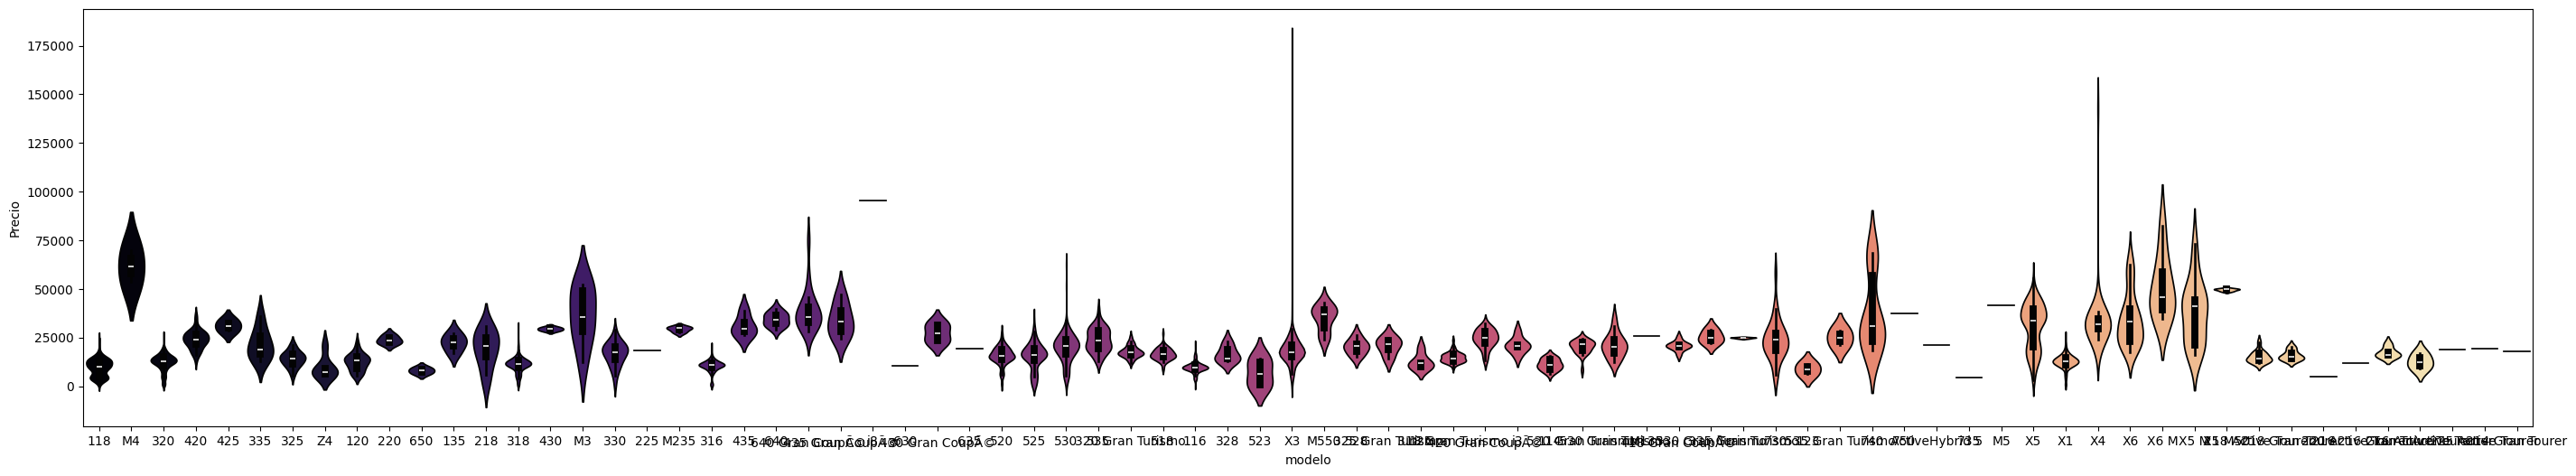

C:\Users\mirei\AppData\Local\Temp\ipykernel_21872\2328987102.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i,y="precio", data=df_bmw2, palette="magma")


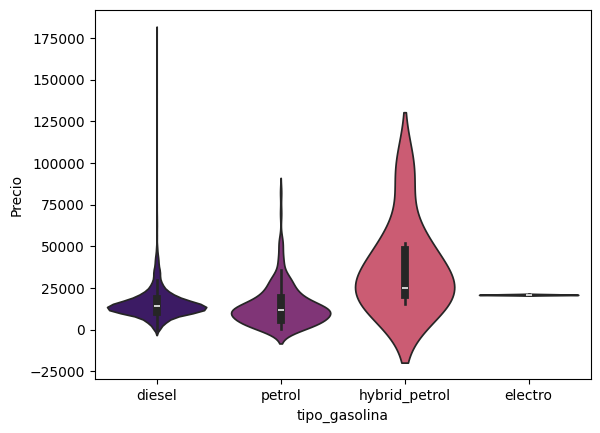

C:\Users\mirei\AppData\Local\Temp\ipykernel_21872\2328987102.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i,y="precio", data=df_bmw2, palette="magma")


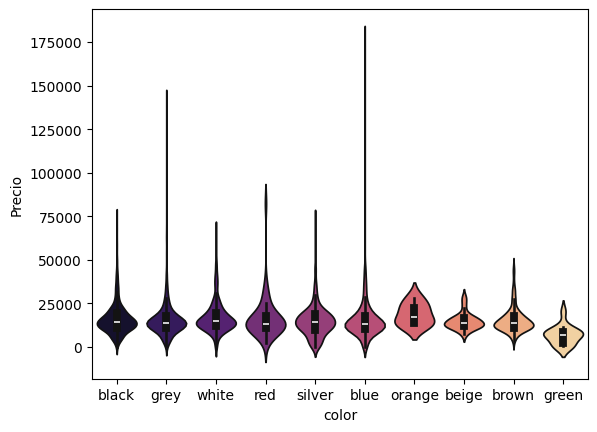

C:\Users\mirei\AppData\Local\Temp\ipykernel_21872\2328987102.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i,y="precio", data=df_bmw2, palette="magma")


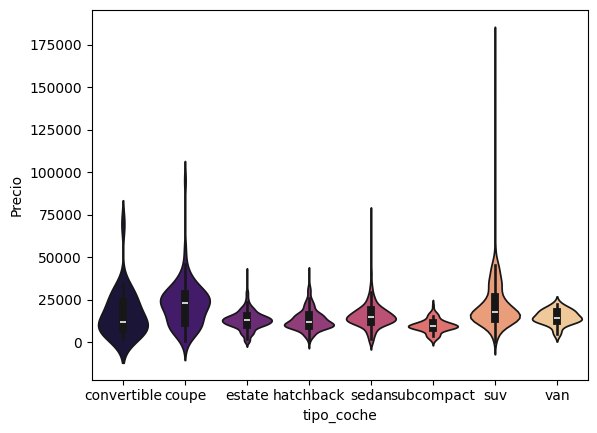

In [500]:
# Creating violin plots for categorical variables with the price to perform a preliminary analysis of how they relate to the price:
# modelo: it influences the price.
# tipo_gasolina: petrol is slightly cheaper than diesel; diesel can be much more expensive. Hybrid and electric have very few records, I will probably remove them.
# color: the most common colors do not seem to influence the price much. The less common colors do.
# tipo_coche: it definitely seems to influence the price. Especially the convertible, coupe, SUV, and van models.
# For now, I will leave all of these columns because they seem to have relevant information.
plt.figure(figsize=(35,6))
for i in l_cat2:
  sns.violinplot(x=i,y="precio", data=df_bmw2, palette="magma")
  plt.xlabel(i)  # Establece la etiqueta del eje x
  plt.ylabel("Precio")  # Establece la etiqueta del eje y
  plt.show()  # Muestra el gráfico

### 1.4 Missing Values

In [501]:
df_bmw3 = df_bmw2.copy()

In [502]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   tipo_gasolina                4838 non-null   object 
 4   color                        4398 non-null   object 
 5   tipo_coche                   3383 non-null   object 
 6   volante_regulable            4843 non-null   uint8  
 7   aire_acondicionado           4843 non-null   uint8  
 8   camara_trasera               4843 non-null   uint8  
 9   asientos_traseros_plegables  4843 non-null   uint8  
 10  elevalunas_electrico         4843 non-null   uint8  
 11  bluetooth                    4843 non-null   uint8  
 12  gps                          4843 non-null   uint8  
 13  alerta_lim_velocid

In [503]:

df_bmw3.isnull().sum()

modelo                            3
km                                2
potencia                          1
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            6
fecha_registro_year            2423
fecha_venta_year                  1
dtype: int64

In [504]:
# List of columns with few null values (including the target column) (<10).
l_pocos_nulos = []
for i in df_bmw3:
  if df_bmw3[i].isna().sum() < 10:
    l_pocos_nulos.append(i)

In [505]:
l_pocos_nulos

['modelo',
 'km',
 'potencia',
 'tipo_gasolina',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad',
 'precio',
 'fecha_venta_year']

In [506]:

# These nulls represent only 0.37% of all my records.
df_bmw3[l_pocos_nulos].isnull().sum().sum()/df_bmw2.shape[0]



0.003716704521990502

In [507]:
# I will delete them directly and reset the index.
df_bmw3.dropna(subset= l_pocos_nulos, inplace = True)
df_bmw3.reset_index(drop = True, inplace = True )

In [508]:
# there are only 3 columns left with missing values
df_bmw3.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                           444
tipo_coche                     1452
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            0
fecha_registro_year            2412
fecha_venta_year                  0
dtype: int64

In [509]:
# COLOR COLUMN: As we saw in the EDA, it was not very relevant for the price, at least not for the most common colors. I replace missing values with the mode.
df_bmw3.color.value_counts(normalize= True)

color
black     0.340790
grey      0.244008
blue      0.146770
white     0.109564
brown     0.068934
silver    0.066195
red       0.010728
beige     0.008446
green     0.003196
orange    0.001370
Name: proportion, dtype: float64

In [510]:
moda_color = df_bmw3.color.mode()[0]
moda_color

'black'

In [511]:
df_bmw3["color"].fillna(moda_color, inplace=True)

C:\Users\mirei\AppData\Local\Temp\ipykernel_21872\1008672137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw3["color"].fillna(moda_color, inplace=True)


In [512]:

df_bmw3.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                     1452
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            0
fecha_registro_year            2412
fecha_venta_year                  0
dtype: int64

In [513]:
# CAR TYPE COLUMN (tipo_coche): I will assign the mode of car_type by model.

In [514]:
df_bmw4 = df_bmw3.copy()

In [515]:
moda_por_grupo = df_bmw4.groupby('modelo')['tipo_coche'].apply(lambda x: x.mode().iloc[0])
moda_por_grupo

modelo
114       hatchback
116       hatchback
118       hatchback
120       hatchback
123       hatchback
           ...     
X6              suv
X6 M            suv
Z4      convertible
i3        hatchback
i8            coupe
Name: tipo_coche, Length: 76, dtype: object

In [516]:
df_bmw4['tipo_coche'].fillna(df_bmw4['modelo'].map(moda_por_grupo), inplace=True)

C:\Users\mirei\AppData\Local\Temp\ipykernel_21872\4169038073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw4['tipo_coche'].fillna(df_bmw4['modelo'].map(moda_por_grupo), inplace=True)


In [517]:
df_bmw3.tipo_coche.value_counts(normalize =True)

tipo_coche
estate         0.326119
sedan          0.243403
suv            0.223540
hatchback      0.144678
subcompact     0.022828
coupe          0.022235
convertible    0.008894
van            0.008301
Name: proportion, dtype: float64

In [518]:
df_bmw4.tipo_coche.value_counts(normalize =True)

tipo_coche
estate         0.375337
suv            0.219482
sedan          0.197927
hatchback      0.155440
coupe          0.019896
subcompact     0.015959
convertible    0.008083
van            0.007876
Name: proportion, dtype: float64

In [519]:
# one column left with missing values
df_bmw4.isnull().sum()

modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                        0
volante_regulable                 0
aire_acondicionado                0
camara_trasera                    0
asientos_traseros_plegables       0
elevalunas_electrico              0
bluetooth                         0
gps                               0
alerta_lim_velocidad              0
precio                            0
fecha_registro_year            2412
fecha_venta_year                  0
dtype: int64

In [520]:
#COLUMN FECHA REGISTRO: Imputing the null values with the median by the "km" percentile.

In [521]:
df_bmw5 = df_bmw4.copy()

In [522]:
# Creating a column with 20 quantiles of "km".
df_bmw5["cuantiles_km"] = pd.qcut(df_bmw5.km, q=20, labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] )

In [523]:
df_bmw5.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_year,fecha_venta_year,cuantiles_km
0,118,140411.0,100.0,diesel,black,hatchback,1,1,0,1,1,1,1,1,11300.0,2012.0,2018.0,10
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,1,0,1,1,1,69700.0,NaN,2018.0,1
2,320,183297.0,120.0,diesel,white,estate,0,0,0,1,1,0,1,0,10200.0,2012.0,2018.0,17
3,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,1,25100.0,NaN,2018.0,9
4,425,97097.0,160.0,diesel,silver,coupe,1,1,0,0,0,1,1,1,33400.0,NaN,2018.0,5


In [524]:
# Grouping by the km percentile.
mediana_por_cuantil_km = df_bmw5.groupby(["cuantiles_km"])["fecha_registro_year"].median()
mediana_por_cuantil_km

C:\Users\mirei\AppData\Local\Temp\ipykernel_21872\2049756870.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_por_cuantil_km = df_bmw5.groupby(["cuantiles_km"])["fecha_registro_year"].median()


cuantiles_km
1     2015.0
2     2014.0
3     2013.0
4     2013.0
5     2013.0
6     2013.0
7     2013.0
8     2013.0
9     2013.0
10    2013.0
11    2013.0
12    2013.0
13    2013.0
14    2013.0
15    2013.0
16    2013.0
17    2013.0
18    2013.0
19    2012.0
20    2008.0
Name: fecha_registro_year, dtype: float64

In [525]:
# Filling the null values with the median by quantiles.
df_bmw5['fecha_registro_year'].fillna(df_bmw5['cuantiles_km'].map(mediana_por_cuantil_km), inplace=True)


C:\Users\mirei\AppData\Local\Temp\ipykernel_21872\536948669.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw5['fecha_registro_year'].fillna(df_bmw5['cuantiles_km'].map(mediana_por_cuantil_km), inplace=True)


In [526]:
# Deleting the "cuantiles_km" column, as it is not needed.
df_bmw5.drop(["cuantiles_km"], axis = 1, inplace = True)

In [527]:
df_bmw5.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_year,fecha_venta_year
0,118,140411.0,100.0,diesel,black,hatchback,1,1,0,1,1,1,1,1,11300.0,2012.0,2018.0
1,M4,13929.0,317.0,petrol,grey,convertible,1,1,0,1,0,1,1,1,69700.0,2015.0,2018.0
2,320,183297.0,120.0,diesel,white,estate,0,0,0,1,1,0,1,0,10200.0,2012.0,2018.0
3,420,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,1,25100.0,2013.0,2018.0
4,425,97097.0,160.0,diesel,silver,coupe,1,1,0,0,0,1,1,1,33400.0,2013.0,2018.0


In [528]:
#  create the "antiguedad" feature (car age) now that I have all the registration and sale years, and delete the "fecha_registro_year" and "fecha_venta_year" columns.
df_bmw5["antiguedad"] = df_bmw5.fecha_venta_year - df_bmw5.fecha_registro_year
df_bmw5["antiguedad"] = df_bmw5["antiguedad"].astype("int64")
df_bmw5.drop(["fecha_registro_year", "fecha_venta_year"], axis = 1, inplace = True)

In [529]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4825 non-null   object 
 1   km                           4825 non-null   float64
 2   potencia                     4825 non-null   float64
 3   tipo_gasolina                4825 non-null   object 
 4   color                        4825 non-null   object 
 5   tipo_coche                   4825 non-null   object 
 6   volante_regulable            4825 non-null   uint8  
 7   aire_acondicionado           4825 non-null   uint8  
 8   camara_trasera               4825 non-null   uint8  
 9   asientos_traseros_plegables  4825 non-null   uint8  
 10  elevalunas_electrico         4825 non-null   uint8  
 11  bluetooth                    4825 non-null   uint8  
 12  gps                          4825 non-null   uint8  
 13  alerta_lim_velocid

In [530]:
df_bmw5.isnull().sum()

modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
antiguedad                     0
dtype: int64

## EDA and Data Preprocessing

### Univariate Analysis and Outlier Handling

In [531]:
df_bmw6 = df_bmw5.copy()

In [532]:
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4825 entries, 0 to 4824
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4825 non-null   object 
 1   km                           4825 non-null   float64
 2   potencia                     4825 non-null   float64
 3   tipo_gasolina                4825 non-null   object 
 4   color                        4825 non-null   object 
 5   tipo_coche                   4825 non-null   object 
 6   volante_regulable            4825 non-null   uint8  
 7   aire_acondicionado           4825 non-null   uint8  
 8   camara_trasera               4825 non-null   uint8  
 9   asientos_traseros_plegables  4825 non-null   uint8  
 10  elevalunas_electrico         4825 non-null   uint8  
 11  bluetooth                    4825 non-null   uint8  
 12  gps                          4825 non-null   uint8  
 13  alerta_lim_velocid

In [533]:
df_bmw6.gps.dtype.kind

'u'

In [534]:
# Function: Value counts for categorical data and histograms for numerical and boolean data
def analisis_univariable(dataset):
  for i in dataset:
    if dataset[i].dtype.kind == "O":
      print(i,'\n', dataset[i].value_counts(), '\n')
    elif (dataset[i].dtype.kind=="f") or (dataset[i].dtype.kind=="i") or (dataset[i].dtype.kind=="u"):
      print(dataset.hist(i))

modelo 
 modelo
320                749
520                631
318                564
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
tipo_gasolina 
 tipo_gasolina
diesel           4623
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64 

color 
 color
black     1937
grey      1069
blue       643
white      480
brown      302
silver     290
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64 

tipo_coche 
 tipo_coche
estate         1811
suv            1059
sedan           955
hatchback       750
coupe            96
subcompact       77
convertible      39
van              38
Name: count, dtype: int64 

[[<Axes: title={'center': 'volante_regulable'}>]]
[[<Axes: title=

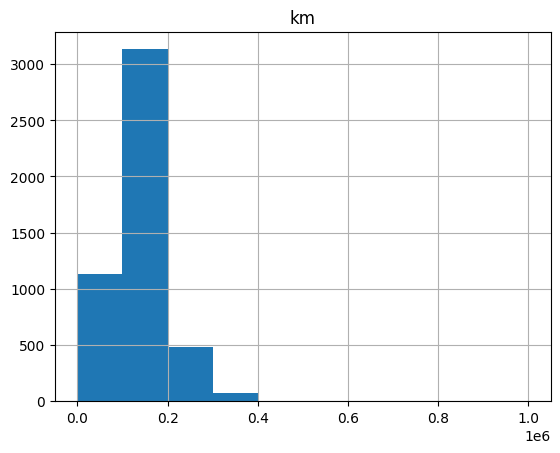

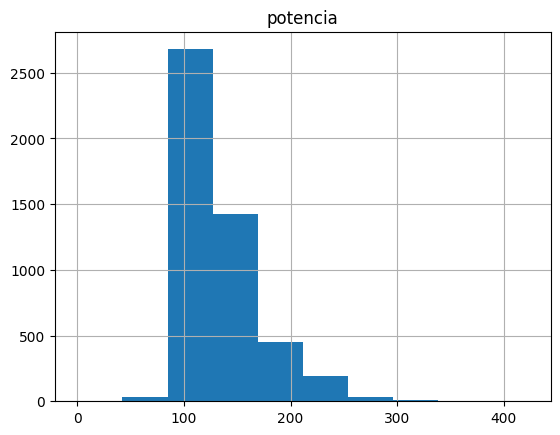

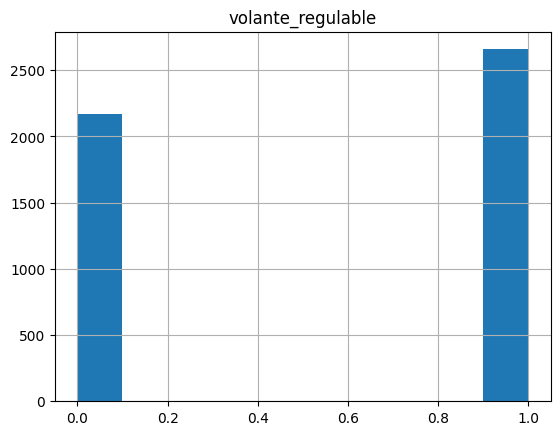

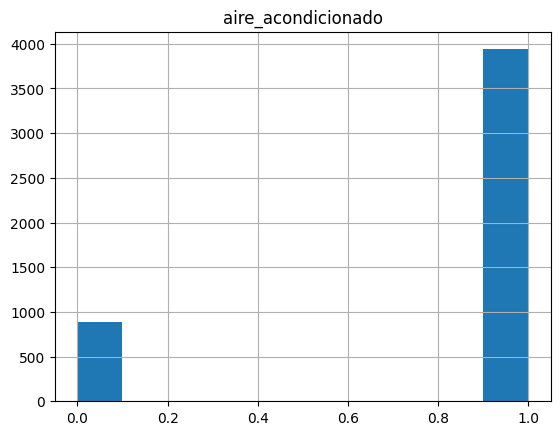

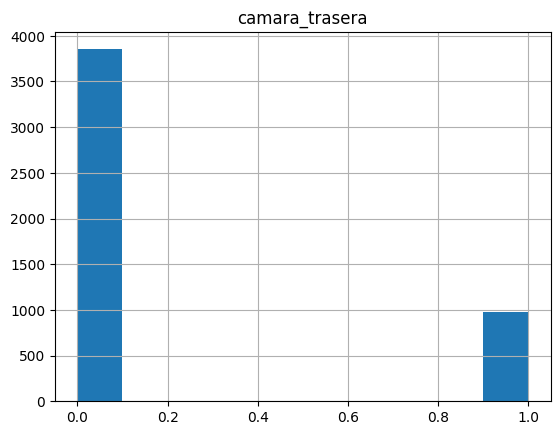

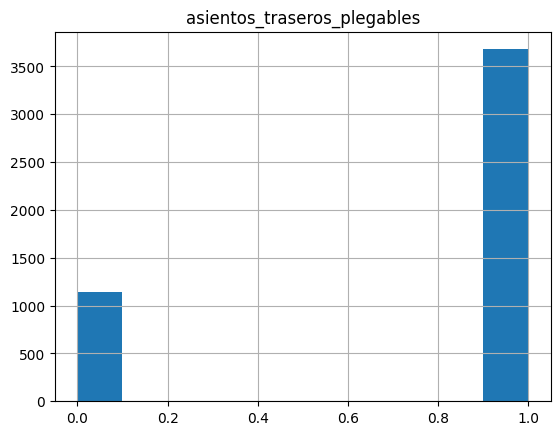

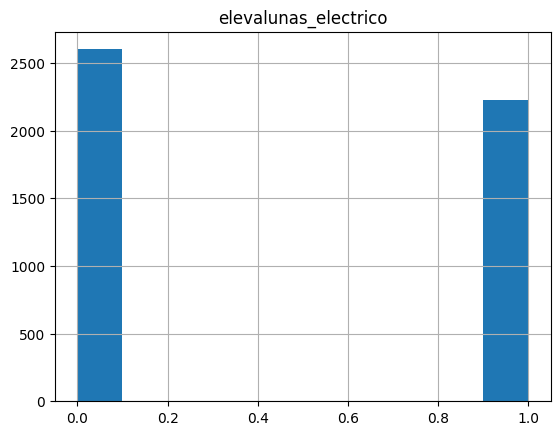

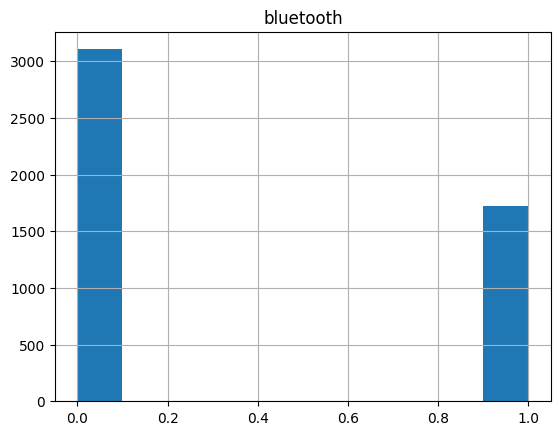

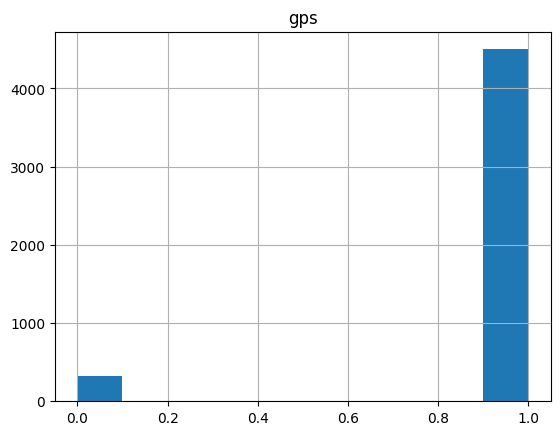

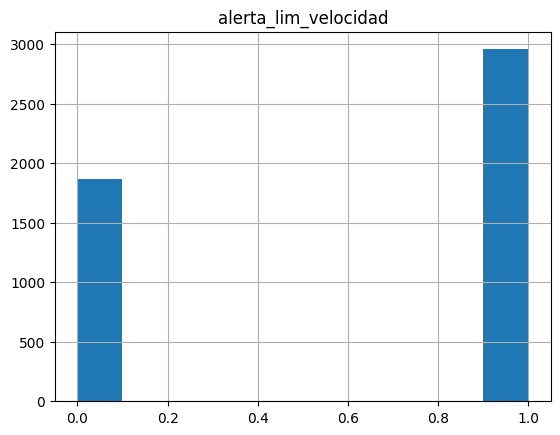

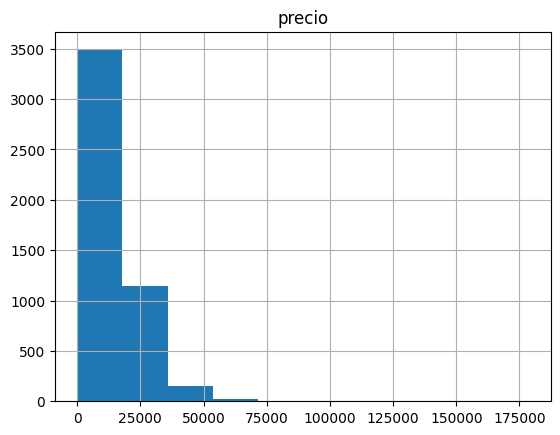

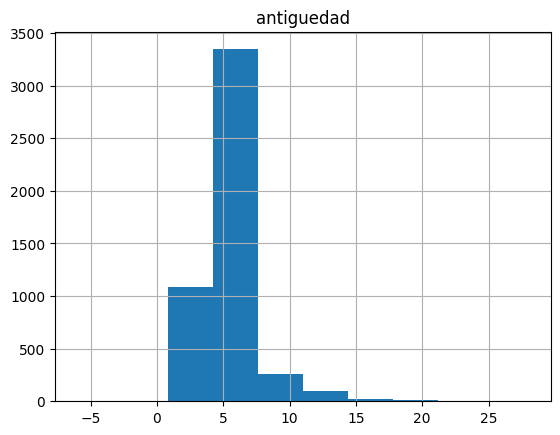

In [535]:


analisis_univariable(df_bmw6)

#### Conclusions for Categorical Data:

**Columns to Leave As-Is**:
- `volante_regulable`
- `aire_acondicionado`
- `camara_trasera`
- `elevalunas_electrico`
- `bluetooth`
- `alerta_lim_velocidad`

**Columns to Transform**:
- **`modelo`**: Group models by series.
- **`tipo_gasolina`**: Remove all types with a count < threshold.
- **`color`**: Group by models.
- **`tipo_coche`**: Remove all types with a count < threshold.
- **`antiguedad`**: Remove negative values.

#### Conclusions for Numerical Data:

- I will further analyze `km`, `power`, ``age``, and ``precio``.
- **`precio`**: Remove outliers. 


### Preprocessing: Numerical Data

<Axes: xlabel='precio'>

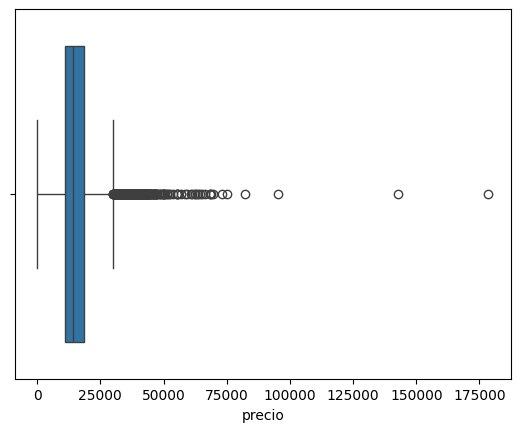

In [536]:
# precio

sns.boxplot(x=df_bmw6["precio"])

In [537]:
df_bmw6["precio"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count      4825.000000
mean      15842.652850
std        9224.243667
min         100.000000
10%        7440.000000
25%       10900.000000
50%       14200.000000
75%       18600.000000
90%       25800.000000
99%       46576.000000
max      178500.000000
Name: precio, dtype: float64

In [538]:
df_bmw6[df_bmw6["precio"]>75000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
89,i8,12402.0,170.0,hybrid_petrol,grey,coupe,1,1,0,0,0,0,0,1,95200.0,3
4131,X6 M,2970.0,423.0,petrol,red,suv,1,1,1,0,0,0,1,1,82400.0,2
4669,X4,103222.0,140.0,diesel,grey,suv,1,1,0,1,1,0,1,1,142800.0,4
4738,X3,72515.0,135.0,diesel,blue,suv,0,0,1,1,0,1,0,1,178500.0,5


In [539]:
# delating outliers in "precio"

df_bmw6.drop(df_bmw6[df_bmw6.precio>75000].index, axis = 0, inplace = True)

<Axes: xlabel='precio'>

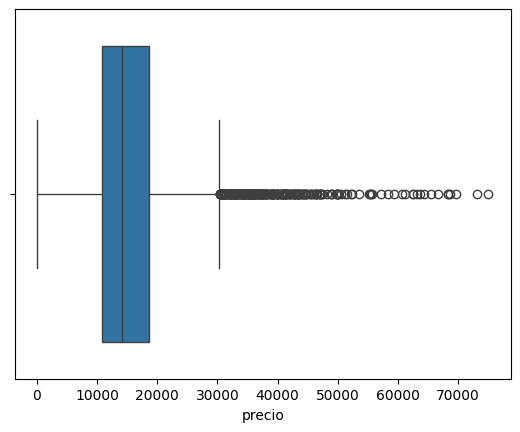

In [540]:
sns.boxplot(x=df_bmw6["precio"])

<Axes: xlabel='potencia'>

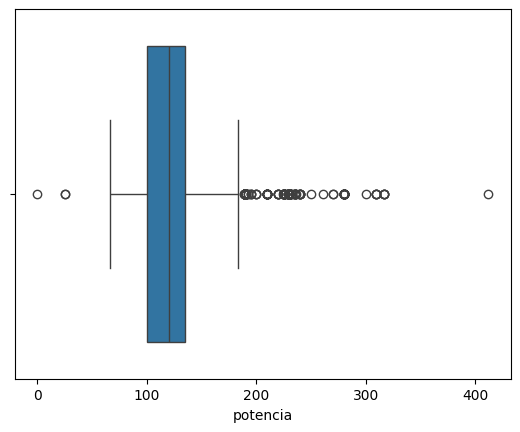

In [541]:
#POTENCIA: Remove outliers < 50 and > 400.
sns.boxplot(x=df_bmw6["potencia"])

In [542]:
df_bmw6[df_bmw6.potencia < 50]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
1781,i3,152328.0,25.0,hybrid_petrol,black,hatchback,0,1,0,1,0,0,1,1,20300.0,5
1910,i3,152470.0,25.0,hybrid_petrol,black,hatchback,0,1,0,1,0,0,1,1,15500.0,5
3750,X1,81770.0,0.0,diesel,white,suv,0,0,0,0,0,0,0,1,11700.0,4


In [543]:
df_bmw6.drop(df_bmw6[df_bmw6.potencia < 50].index, axis = 0, inplace = True)
df_bmw6.drop(df_bmw6[df_bmw6.potencia > 250].index, axis = 0, inplace = True)

<Axes: xlabel='potencia'>

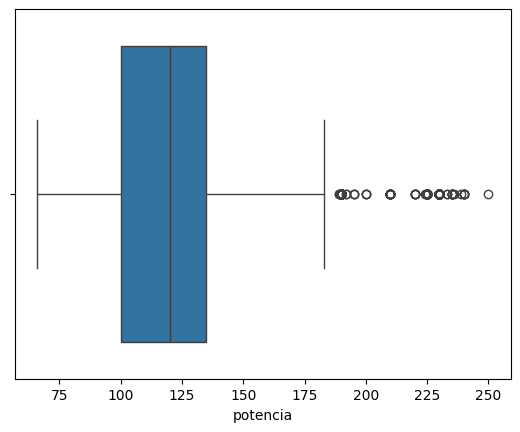

In [544]:
sns.boxplot(x=df_bmw6["potencia"])

<Axes: xlabel='km'>

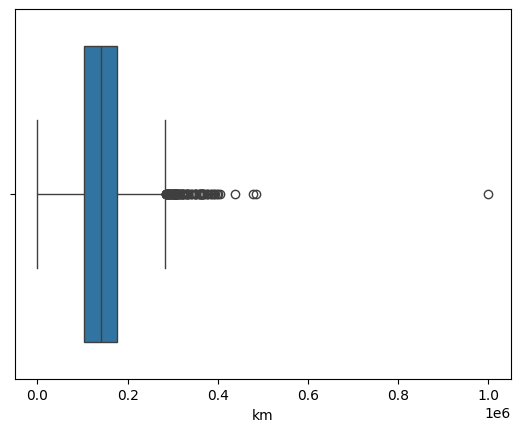

In [545]:
# KM: Remove outliers above 0.6e6.
sns.boxplot(x=df_bmw6["km"])

In [546]:
df_bmw6["km"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    4.773000e+03
mean     1.413283e+05
std      6.009579e+04
min     -6.400000e+01
10%      6.569460e+04
25%      1.032260e+05
50%      1.415870e+05
75%      1.754850e+05
90%      2.054740e+05
max      1.000376e+06
Name: km, dtype: float64

In [547]:
df_bmw6[df_bmw6.km > 0.6e6]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,antiguedad
3717,118,1000376.0,90.0,diesel,black,hatchback,1,0,0,0,0,1,1,0,1400.0,13


In [548]:
df_bmw6.drop(df_bmw6[df_bmw6.km > 0.6e6].index, axis = 0, inplace = True)

<Axes: xlabel='km'>

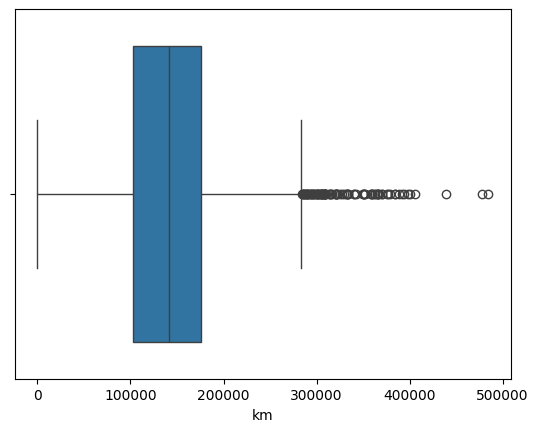

In [549]:
sns.boxplot(x=df_bmw6["km"])

In [550]:
df_bmw6["antiguedad"].value_counts(normalize = True)

antiguedad
 5     0.554904
 4     0.153604
 6     0.116513
 3     0.058047
 10    0.036253
 7     0.024099
 8     0.010687
 2     0.009220
 9     0.008173
 12    0.006077
 11    0.005868
 13    0.005658
 14    0.002096
 17    0.001676
 15    0.001676
 1     0.001048
 16    0.000838
 21    0.000838
 18    0.000629
 19    0.000629
-6     0.000210
-1     0.000210
-4     0.000210
-5     0.000210
 23    0.000210
 28    0.000210
 24    0.000210
Name: proportion, dtype: float64

In [551]:
# Remove car age less than 1 and greater than 12.
df_bmw6.drop(df_bmw6[df_bmw6.antiguedad <=2].index, axis = 0, inplace = True)
df_bmw6.drop(df_bmw6[df_bmw6.antiguedad >=11].index, axis = 0, inplace = True)

In [552]:
df_bmw6["antiguedad"].value_counts(normalize = True)

antiguedad
5     0.576655
4     0.159625
6     0.121080
3     0.060322
10    0.037674
7     0.025044
8     0.011106
9     0.008493
Name: proportion, dtype: float64

In [553]:

# GPS column: Remove records without GPS, then delete the column.
df_bmw6.gps.value_counts(normalize = True)

gps
1    0.931185
0    0.068815
Name: proportion, dtype: float64

In [554]:
df_bmw6.drop(df_bmw6[df_bmw6.gps ==0].index, axis = 0, inplace = True)
df_bmw6.drop(["gps"], axis = 1, inplace = True)

In [555]:
df_bmw6.reset_index(drop=True, inplace=True)
df_bmw6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4276 entries, 0 to 4275
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4276 non-null   object 
 1   km                           4276 non-null   float64
 2   potencia                     4276 non-null   float64
 3   tipo_gasolina                4276 non-null   object 
 4   color                        4276 non-null   object 
 5   tipo_coche                   4276 non-null   object 
 6   volante_regulable            4276 non-null   uint8  
 7   aire_acondicionado           4276 non-null   uint8  
 8   camara_trasera               4276 non-null   uint8  
 9   asientos_traseros_plegables  4276 non-null   uint8  
 10  elevalunas_electrico         4276 non-null   uint8  
 11  bluetooth                    4276 non-null   uint8  
 12  alerta_lim_velocidad         4276 non-null   uint8  
 13  precio            

In [556]:
df_bmw66 = df_bmw6.copy()

### Preprocessing: Categorical Data

In [557]:

# MODELO: I will group models by series. For example, the 318 and 320 models belong to the BMW series 3. 
# The main difference between them within the series is the power. Since I have the power data separately, I believe I won't lose information by grouping them.
# I will also separate the "suffix" (Gran Coupé, Gran Turismo, etc.): this represents the body style, and I will check if it provides information about the price.

In [558]:

df_bmw66['modelo'].unique()


array(['118', '320', '420', '425', '335', '325', 'Z4', '120', '135',
       '218', '220', '430', '318', 'M3', '225', 'M235', '435', '640',
       '640 Gran CoupÃ©', '435 Gran CoupÃ©', '630', '430 Gran CoupÃ©',
       '635', '520', '316', '530', '330', '535', '525', '518', '116',
       '523', 'X3', '528', '328', '325 Gran Turismo', '125',
       '318 Gran Turismo', '320 Gran Turismo', '420 Gran CoupÃ©', '114',
       '520 Gran Turismo', '530 Gran Turismo', 'i3', 'M135',
       '418 Gran CoupÃ©', '330 Gran Turismo', '335 Gran Turismo', '730',
       '123', '535 Gran Turismo', '740', 'ActiveHybrid 5', '735', 'X5',
       'X1', 'X6', 'X5 M', 'X4', 'X6 M', '218 Active Tourer',
       '218 Gran Tourer', '220 Active Tourer', '216 Gran Tourer',
       '216 Active Tourer', 'Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [559]:
# I will remove these two models that seem to be outliers.
df_bmw66[df_bmw66['modelo'].isin(['ActiveHybrid 5', 'Active Tourer'])]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad
2625,ActiveHybrid 5,94374.0,225.0,hybrid_petrol,brown,sedan,1,1,0,0,1,1,1,21100.0,6
4257,Active Tourer,48380.0,100.0,diesel,black,van,1,1,0,1,0,1,0,19000.0,4


In [560]:
modelo_eliminar1 = df_bmw66[df_bmw66['modelo'].isin(['ActiveHybrid 5', 'Active Tourer'])].index

In [561]:
df_bmw66.shape


(4276, 15)

In [562]:
df_bmw66.drop(modelo_eliminar1, axis = 0, inplace = True)


In [563]:
df_bmw66.shape

(4274, 15)

In [564]:
df_bmw66['modelo'].unique()

array(['118', '320', '420', '425', '335', '325', 'Z4', '120', '135',
       '218', '220', '430', '318', 'M3', '225', 'M235', '435', '640',
       '640 Gran CoupÃ©', '435 Gran CoupÃ©', '630', '430 Gran CoupÃ©',
       '635', '520', '316', '530', '330', '535', '525', '518', '116',
       '523', 'X3', '528', '328', '325 Gran Turismo', '125',
       '318 Gran Turismo', '320 Gran Turismo', '420 Gran CoupÃ©', '114',
       '520 Gran Turismo', '530 Gran Turismo', 'i3', 'M135',
       '418 Gran CoupÃ©', '330 Gran Turismo', '335 Gran Turismo', '730',
       '123', '535 Gran Turismo', '740', '735', 'X5', 'X1', 'X6', 'X5 M',
       'X4', 'X6 M', '218 Active Tourer', '218 Gran Tourer',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       '214 Gran Tourer'], dtype=object)

In [565]:
# I will split into two columns: model and body style (by the first space).
df_bmw66[["serie", "carroceria"]] = df_bmw66['modelo'].str.split(n=1, expand=True)
df_bmw66.carroceria.value_counts()

carroceria
Gran Turismo     212
Gran CoupÃ©       63
M                 18
Active Tourer     15
Gran Tourer       13
Name: count, dtype: int64

In [566]:
df_bmw66['serie'].unique()

array(['118', '320', '420', '425', '335', '325', 'Z4', '120', '135',
       '218', '220', '430', '318', 'M3', '225', 'M235', '435', '640',
       '630', '635', '520', '316', '530', '330', '535', '525', '518',
       '116', '523', 'X3', '528', '328', '125', '114', 'i3', 'M135',
       '418', '730', '123', '740', '735', 'X5', 'X1', 'X6', 'X4', '216',
       '214'], dtype=object)

In [567]:
# delete original "modelo"
df_bmw66.drop(["modelo"], axis = 1, inplace = True)

In [568]:
df_bmw66.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad,serie,carroceria
0,140411.0,100.0,diesel,black,hatchback,1,1,0,1,1,1,1,11300.0,6,118,None
1,183297.0,120.0,diesel,white,estate,0,0,0,1,1,0,0,10200.0,6,320,None
2,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,5,420,None
3,97097.0,160.0,diesel,silver,coupe,1,1,0,0,0,1,1,33400.0,5,425,None
4,152352.0,225.0,petrol,black,coupe,1,1,0,0,1,1,1,17100.0,7,335,None


In [569]:
df_bmw66.carroceria.isnull().sum()

3953

In [570]:
# I will replace the null values in body style with "undefined".
# df_bmw66['carroceria'].fillna("sin definir", inplace=True)
# I will remove the "carroceria" column because it mostly contains null values.
df_bmw66.drop(["carroceria"], axis = 1, inplace = True)

In [571]:
#agrupo la columna serie por series
df_bmw66['serie'].unique()

array(['118', '320', '420', '425', '335', '325', 'Z4', '120', '135',
       '218', '220', '430', '318', 'M3', '225', 'M235', '435', '640',
       '630', '635', '520', '316', '530', '330', '535', '525', '518',
       '116', '523', 'X3', '528', '328', '125', '114', 'i3', 'M135',
       '418', '730', '123', '740', '735', 'X5', 'X1', 'X6', 'X4', '216',
       '214'], dtype=object)

In [572]:
# Group by series.
for i in range(1, 8):
    patron = r'^{}\d{{2}}$'.format(i)  # Expresión regular con la variable 'i'

    # Filter the DataFrame using the regular expression and assign "serie i" to the values that match the pattern.
    df_bmw66.loc[df_bmw66['serie'].str.contains(patron), 'serie'] = 'Serie {}'.format(i)


In [573]:
df_bmw66['serie'].unique()

array(['Serie 1', 'Serie 3', 'Serie 4', 'Z4', 'Serie 2', 'M3', 'M235',
       'Serie 6', 'Serie 5', 'X3', 'i3', 'M135', 'Serie 7', 'X5', 'X1',
       'X6', 'X4'], dtype=object)

In [574]:
df_bmw66.serie.value_counts()

serie
Serie 3    1612
Serie 5    1065
Serie 1     512
X3          362
X1          220
X5          216
Serie 4      86
Serie 7      46
Serie 2      39
X6           39
X4           34
Serie 6      29
Z4            5
i3            4
M235          3
M3            1
M135          1
Name: count, dtype: int64

In [575]:

# Create a function to remove categories with value_counts < threshold.
def registros_eliminar(dataset, columna, umbral):
    lista_eliminar= []
    tabla=dataset[columna].value_counts().reset_index()
    print(tabla)
    for i in range(0,len(tabla)):
      if tabla.iloc[i, 1] < umbral:
        lista_eliminar.append(tabla.iloc[i][columna])
    return lista_eliminar

In [576]:
# I will create a function to remove those records from the dataset.
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)

In [577]:
# SERIE: Remove all models with fewer than 10 records.
lista_eliminar_modelo = registros_eliminar(df_bmw66, "serie", 10)
lista_eliminar_modelo


      serie  count
0   Serie 3   1612
1   Serie 5   1065
2   Serie 1    512
3        X3    362
4        X1    220
5        X5    216
6   Serie 4     86
7   Serie 7     46
8   Serie 2     39
9        X6     39
10       X4     34
11  Serie 6     29
12       Z4      5
13       i3      4
14     M235      3
15       M3      1
16     M135      1


['Z4', 'i3', 'M235', 'M3', 'M135']

In [578]:
eliminar_lista_df(df_bmw66, "serie", lista_eliminar_modelo)

In [579]:
df_bmw6.shape


(4276, 15)

In [580]:
df_bmw66.shape

(4260, 15)

In [581]:
len(df_bmw6.modelo.value_counts())

67

In [582]:
len(df_bmw66.serie.value_counts())

12

In [583]:
df_bmw66.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4260 entries, 0 to 4275
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4260 non-null   float64
 1   potencia                     4260 non-null   float64
 2   tipo_gasolina                4260 non-null   object 
 3   color                        4260 non-null   object 
 4   tipo_coche                   4260 non-null   object 
 5   volante_regulable            4260 non-null   uint8  
 6   aire_acondicionado           4260 non-null   uint8  
 7   camara_trasera               4260 non-null   uint8  
 8   asientos_traseros_plegables  4260 non-null   uint8  
 9   elevalunas_electrico         4260 non-null   uint8  
 10  bluetooth                    4260 non-null   uint8  
 11  alerta_lim_velocidad         4260 non-null   uint8  
 12  precio                       4260 non-null   float64
 13  antiguedad             

In [584]:
#TIPO_GASOLINA: Remove "petrol" records, then delete the column since most are diesel. There are too few for the model to work effectively.
df_bmw66.tipo_gasolina.value_counts()

tipo_gasolina
diesel           4139
petrol            119
hybrid_petrol       2
Name: count, dtype: int64

In [585]:

lista_eliminar_gasolina = registros_eliminar(df_bmw66, "tipo_gasolina", 200)
lista_eliminar_gasolina

   tipo_gasolina  count
0         diesel   4139
1         petrol    119
2  hybrid_petrol      2


['petrol', 'hybrid_petrol']

In [586]:
eliminar_lista_df(df_bmw66, "tipo_gasolina", lista_eliminar_gasolina)

In [587]:
df_bmw66.tipo_gasolina.value_counts()


tipo_gasolina
diesel    4139
Name: count, dtype: int64

In [588]:
df_bmw66.drop(["tipo_gasolina"], axis = 1, inplace = True)

In [589]:
#TIPO_COCHE: For now, I will leave it as is. To improve the model's efficiency, I could consider removing the last four or grouping them under "others."
df_bmw66.tipo_coche.value_counts()

tipo_coche
estate         1625
suv             863
sedan           819
hatchback       653
subcompact       69
coupe            64
van              28
convertible      18
Name: count, dtype: int64

In [590]:
#COLOR: grouping the less populated categories as "otros"
df_bmw66.color.value_counts()

color
black     1665
grey       928
blue       554
white      383
brown      284
silver     237
red         41
beige       36
green        7
orange       4
Name: count, dtype: int64

In [591]:
df_bmw66.loc[df_bmw66['color'].isin(["red", "beige", "green", "orange"]), 'color'] = "otros"
df_bmw66.color.value_counts()

color
black     1665
grey       928
blue       554
white      383
brown      284
silver     237
otros       88
Name: count, dtype: int64

In [592]:
# reset_index
df_bmw66.reset_index(drop=True, inplace=True)

In [593]:
df_bmw66.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4139 non-null   float64
 1   potencia                     4139 non-null   float64
 2   color                        4139 non-null   object 
 3   tipo_coche                   4139 non-null   object 
 4   volante_regulable            4139 non-null   uint8  
 5   aire_acondicionado           4139 non-null   uint8  
 6   camara_trasera               4139 non-null   uint8  
 7   asientos_traseros_plegables  4139 non-null   uint8  
 8   elevalunas_electrico         4139 non-null   uint8  
 9   bluetooth                    4139 non-null   uint8  
 10  alerta_lim_velocidad         4139 non-null   uint8  
 11  precio                       4139 non-null   float64
 12  antiguedad                   4139 non-null   int64  
 13  serie             

### Correlation Analysis

In [594]:
df_bmw7 = df_bmw66.copy()

In [595]:
df_bmw7.head()

,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad,serie
0,140411.0,100.0,black,hatchback,1,1,0,1,1,1,1,11300.0,6,Serie 1
1,183297.0,120.0,white,estate,0,0,0,1,1,0,0,10200.0,6,Serie 3
2,128035.0,135.0,otros,convertible,1,1,0,1,1,1,1,25100.0,5,Serie 4
3,97097.0,160.0,silver,coupe,1,1,0,0,0,1,1,33400.0,5,Serie 4
4,205219.0,145.0,grey,convertible,1,1,0,1,1,1,1,12400.0,6,Serie 3


In [596]:
df_bmw7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4139 non-null   float64
 1   potencia                     4139 non-null   float64
 2   color                        4139 non-null   object 
 3   tipo_coche                   4139 non-null   object 
 4   volante_regulable            4139 non-null   uint8  
 5   aire_acondicionado           4139 non-null   uint8  
 6   camara_trasera               4139 non-null   uint8  
 7   asientos_traseros_plegables  4139 non-null   uint8  
 8   elevalunas_electrico         4139 non-null   uint8  
 9   bluetooth                    4139 non-null   uint8  
 10  alerta_lim_velocidad         4139 non-null   uint8  
 11  precio                       4139 non-null   float64
 12  antiguedad                   4139 non-null   int64  
 13  serie             

In [597]:
#correlation
corr = df_bmw7.corr(numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad
km,1.000000,0.004881,0.052669,-0.003694,-0.003218,-0.038375,0.032221,-0.019580,-0.004560,-0.395337,0.582392
potencia,0.004881,1.000000,0.344637,0.215893,0.328207,0.139218,0.397198,0.190051,0.448464,0.677006,0.016815
volante_regulable,0.052669,0.344637,1.000000,0.227847,0.254728,0.057785,0.251308,0.081010,0.209028,0.303169,0.087061
aire_acondicionado,-0.003694,0.215893,0.227847,1.000000,0.116723,0.027595,0.193022,0.076395,0.212415,0.254551,-0.093399
camara_trasera,-0.003218,0.328207,0.254728,0.116723,1.000000,0.051139,0.199557,0.115905,0.179653,0.278454,0.041430
asientos_traseros_plegables,-0.038375,0.139218,0.057785,0.027595,0.051139,1.000000,0.068834,0.012748,0.108544,0.140628,-0.016375
elevalunas_electrico,0.032221,0.397198,0.251308,0.193022,0.199557,0.068834,1.000000,0.197306,0.333830,0.334043,-0.011234
bluetooth,-0.019580,0.190051,0.081010,0.076395,0.115905,0.012748,0.197306,1.000000,0.096803,0.187095,-0.032012
alerta_lim_velocidad,-0.004560,0.448464,0.209028,0.212415,0.179653,0.108544,0.333830,0.096803,1.000000,0.419461,-0.068136
precio,-0.395337,0.677006,0.303169,0.254551,0.278454,0.140628,0.334043,0.187095,0.419461,1.000000,-0.341358


In [598]:
df_bmw8 = df_bmw7.copy()

### Features vs. Target Analysis

In [599]:
df_bmw8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4139 non-null   float64
 1   potencia                     4139 non-null   float64
 2   color                        4139 non-null   object 
 3   tipo_coche                   4139 non-null   object 
 4   volante_regulable            4139 non-null   uint8  
 5   aire_acondicionado           4139 non-null   uint8  
 6   camara_trasera               4139 non-null   uint8  
 7   asientos_traseros_plegables  4139 non-null   uint8  
 8   elevalunas_electrico         4139 non-null   uint8  
 9   bluetooth                    4139 non-null   uint8  
 10  alerta_lim_velocidad         4139 non-null   uint8  
 11  precio                       4139 non-null   float64
 12  antiguedad                   4139 non-null   int64  
 13  serie             

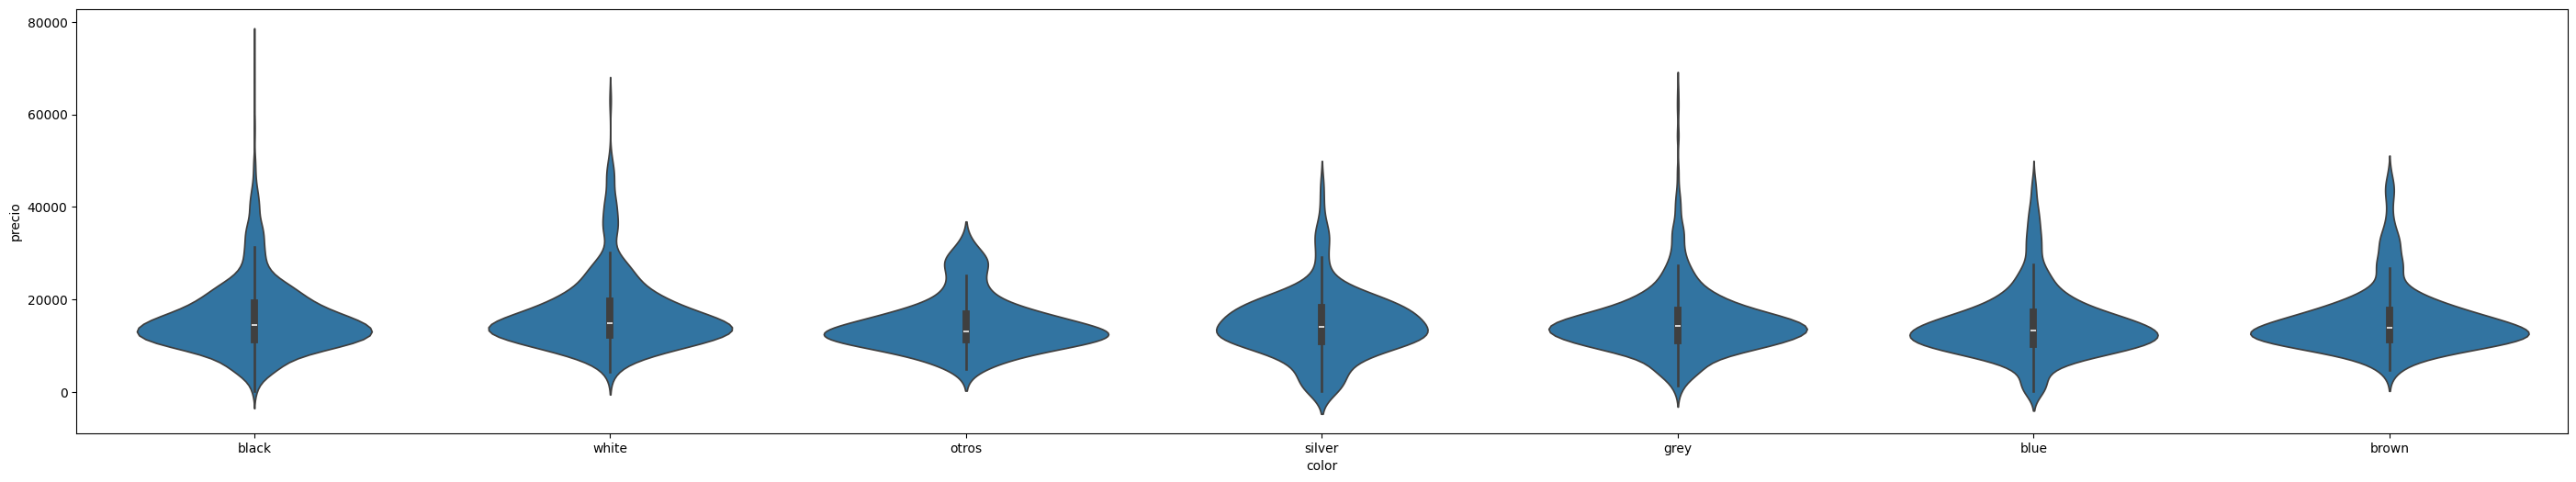

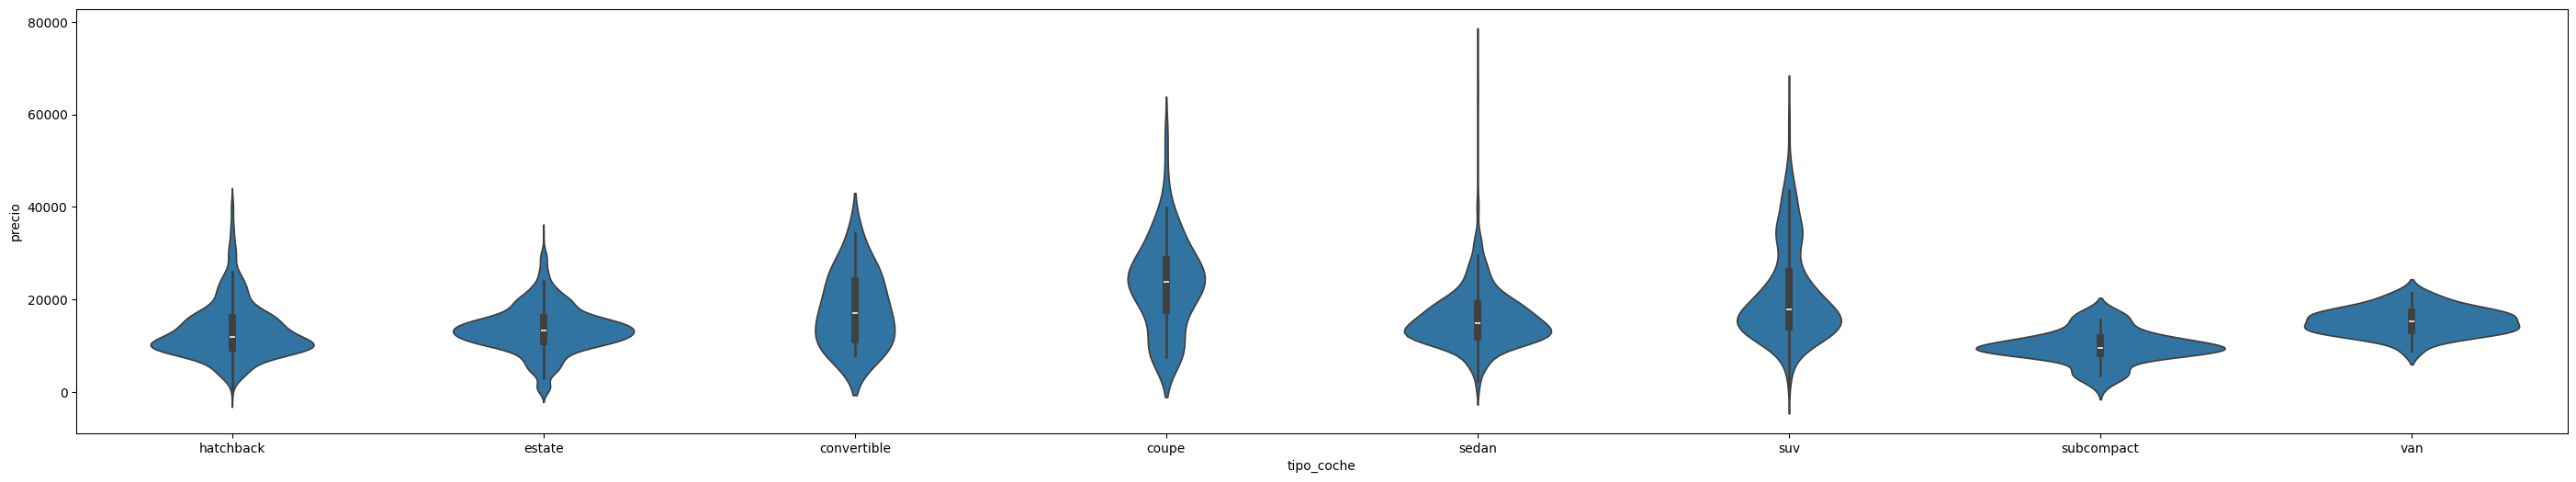

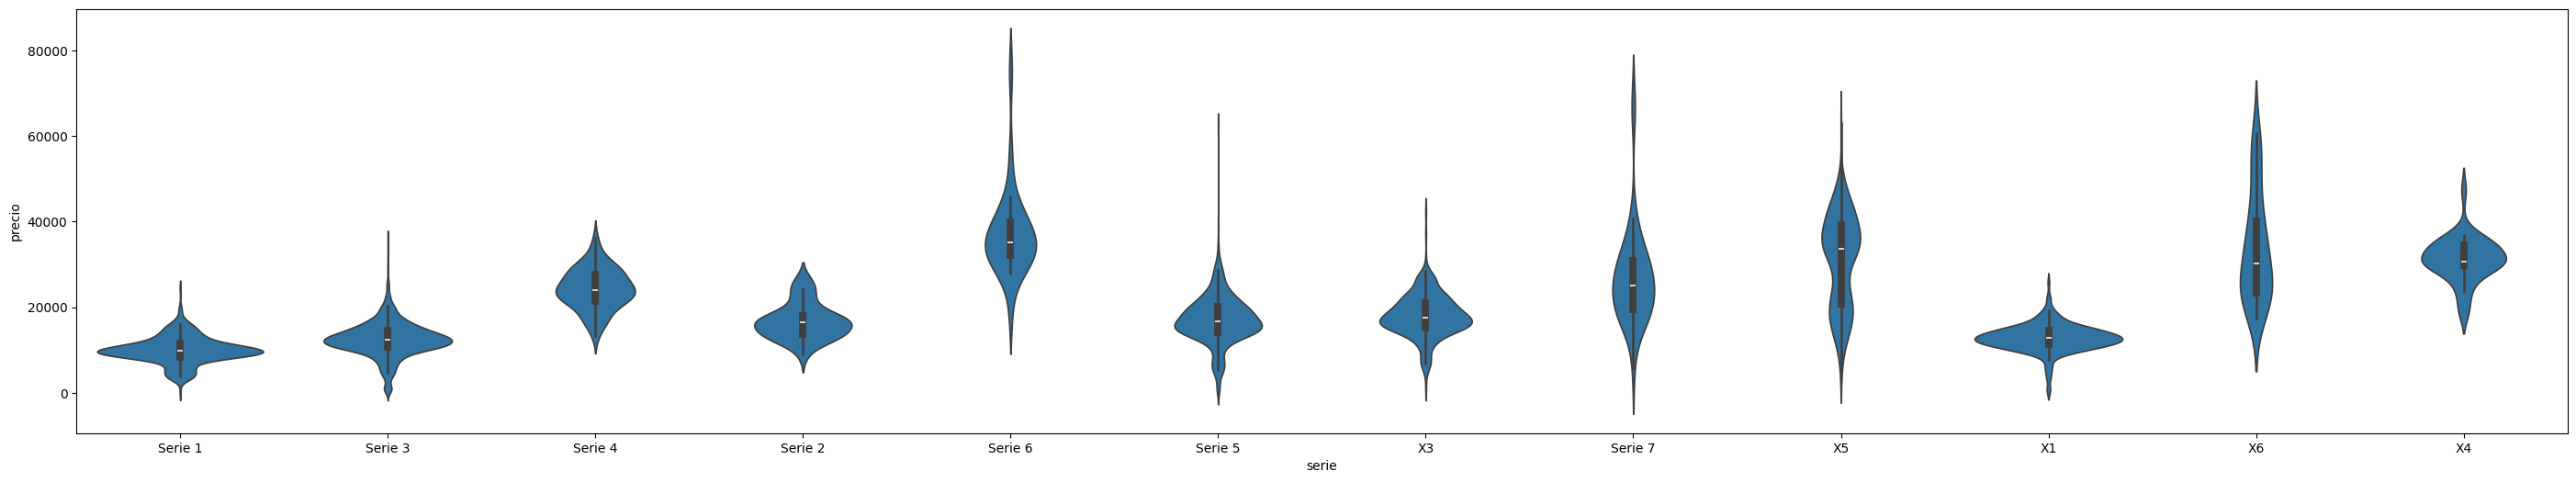

In [600]:
# CategoricaL features

for i in df_bmw8:
  if (df_bmw8[i].dtype.kind =="O"):
    plt.figure(figsize=(35,6))
    sns.violinplot(x=i,y="precio", data=df_bmw8)

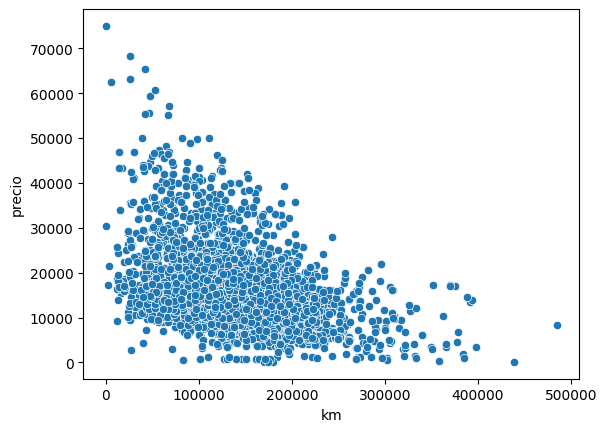

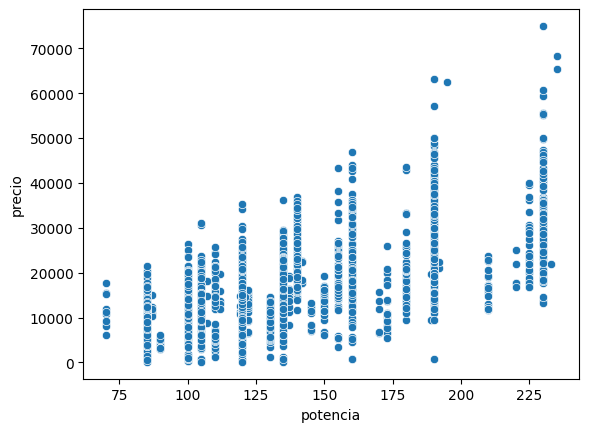

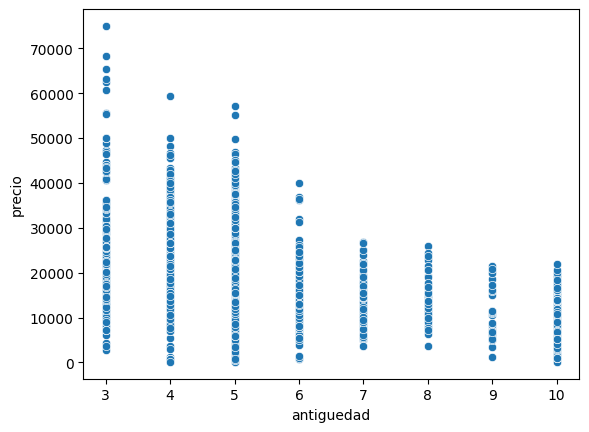

In [601]:
# Numerical features
for i in df_bmw8:
  if (df_bmw8[i].dtype.kind in ("i","f")) and (i!="precio"):
    plt.figure()
    sns.scatterplot(x=i,y="precio", data=df_bmw8)

### Transformation of Categorical Features to Numerical Features

In [602]:
df_bmw9 = df_bmw8.copy()

In [603]:
df_bmw9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4139 non-null   float64
 1   potencia                     4139 non-null   float64
 2   color                        4139 non-null   object 
 3   tipo_coche                   4139 non-null   object 
 4   volante_regulable            4139 non-null   uint8  
 5   aire_acondicionado           4139 non-null   uint8  
 6   camara_trasera               4139 non-null   uint8  
 7   asientos_traseros_plegables  4139 non-null   uint8  
 8   elevalunas_electrico         4139 non-null   uint8  
 9   bluetooth                    4139 non-null   uint8  
 10  alerta_lim_velocidad         4139 non-null   uint8  
 11  precio                       4139 non-null   float64
 12  antiguedad                   4139 non-null   int64  
 13  serie             

In [604]:
l_num9, l_bool9, l_cat9 = obtener_lista_variables(df_bmw9)
print("l_num9", l_num9, "\n", "l_bool9", l_bool9, "\n", "l_cat9",l_cat9 )

l_num9 ['km', 'potencia', 'antiguedad'] 
 l_bool9 ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad'] 
 l_cat9 ['color', 'tipo_coche', 'serie']


In [605]:
df_bmw10=pd.get_dummies(data=df_bmw9,
                        columns=l_cat9
                               )

In [606]:
pd.set_option('display.max_columns', None)

In [607]:
df_bmw10.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad,color_black,color_blue,color_brown,color_grey,color_otros,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,serie_Serie 1,serie_Serie 2,serie_Serie 3,serie_Serie 4,serie_Serie 5,serie_Serie 6,serie_Serie 7,serie_X1,serie_X3,serie_X4,serie_X5,serie_X6
0,140411.0,100.0,1,1,0,1,1,1,1,11300.0,6,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,183297.0,120.0,0,0,0,1,1,0,0,10200.0,6,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,128035.0,135.0,1,1,0,1,1,1,1,25100.0,5,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,97097.0,160.0,1,1,0,0,0,1,1,33400.0,5,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,205219.0,145.0,1,1,0,1,1,1,1,12400.0,6,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [608]:
df_bmw10.shape

(4139, 38)

In [609]:
#  bool to int8
for i in df_bmw10:
  if df_bmw10[i].dtype.kind == "b":
    df_bmw10[i] = df_bmw10[i].astype("uint8")

df_bmw10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4139 non-null   float64
 1   potencia                     4139 non-null   float64
 2   volante_regulable            4139 non-null   uint8  
 3   aire_acondicionado           4139 non-null   uint8  
 4   camara_trasera               4139 non-null   uint8  
 5   asientos_traseros_plegables  4139 non-null   uint8  
 6   elevalunas_electrico         4139 non-null   uint8  
 7   bluetooth                    4139 non-null   uint8  
 8   alerta_lim_velocidad         4139 non-null   uint8  
 9   precio                       4139 non-null   float64
 10  antiguedad                   4139 non-null   int64  
 11  color_black                  4139 non-null   uint8  
 12  color_blue                   4139 non-null   uint8  
 13  color_brown       

###  Scale Numerical Variables and Final Correlation

In [610]:
df_bmw11 = df_bmw10.copy()

In [611]:
l_num11, l_bool11, l_cat11 = obtener_lista_variables(df_bmw11)
print("l_num11", l_num11, "\n", "l_bool11", l_bool11, "\n", "l_cat11",l_cat11 )

l_num11 ['km', 'potencia', 'antiguedad'] 
 l_bool11 ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad', 'color_black', 'color_blue', 'color_brown', 'color_grey', 'color_otros', 'color_silver', 'color_white', 'tipo_coche_convertible', 'tipo_coche_coupe', 'tipo_coche_estate', 'tipo_coche_hatchback', 'tipo_coche_sedan', 'tipo_coche_subcompact', 'tipo_coche_suv', 'tipo_coche_van', 'serie_Serie 1', 'serie_Serie 2', 'serie_Serie 3', 'serie_Serie 4', 'serie_Serie 5', 'serie_Serie 6', 'serie_Serie 7', 'serie_X1', 'serie_X3', 'serie_X4', 'serie_X5', 'serie_X6'] 
 l_cat11 []


In [313]:
#def minmaxTransformacion(variable_transformar):
    #minMaxResultado=MinMaxScaler()
    #df_bmw11[variable_transformar]=minMaxResultado.fit_transform(df_bmw11[variable_transformar].values.reshape(-1,1))
    #return minMaxResultado

In [612]:
minMaxResultado=MinMaxScaler()
df_bmw11[l_num11]=minMaxResultado.fit_transform(df_bmw11[l_num11])

In [613]:
df_bmw11.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad,color_black,color_blue,color_brown,color_grey,color_otros,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,serie_Serie 1,serie_Serie 2,serie_Serie 3,serie_Serie 4,serie_Serie 5,serie_Serie 6,serie_Serie 7,serie_X1,serie_X3,serie_X4,serie_X5,serie_X6
0,0.289831,0.181818,1,1,0,1,1,1,1,11300.0,0.428571,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.378314,0.303030,0,0,0,1,1,0,0,10200.0,0.428571,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.264297,0.393939,1,1,0,1,1,1,1,25100.0,0.285714,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.200465,0.545455,1,1,0,0,0,1,1,33400.0,0.285714,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.423544,0.454545,1,1,0,1,1,1,1,12400.0,0.428571,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [614]:
corr = df_bmw11.corr()

In [615]:
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [616]:
corr2.stack()

km        potencia                       0.004881
          volante_regulable              0.052669
          aire_acondicionado            -0.003694
          camara_trasera                -0.003218
          asientos_traseros_plegables   -0.038375
                                           ...   
serie_X3  serie_X5                      -0.071822
          serie_X6                      -0.029358
serie_X4  serie_X5                      -0.021146
          serie_X6                      -0.008643
serie_X5  serie_X6                      -0.022067
Length: 703, dtype: float64

In [617]:
# delate null values
corr3=corr2.unstack().dropna()

In [618]:
corr4 = corr3.sort_values()

In [619]:
pd.set_option("display.max_rows",None)

In [620]:
corr4

serie_Serie 5                serie_Serie 3                 -0.451709
color_grey                   color_black                   -0.441023
tipo_coche_suv               tipo_coche_estate             -0.412646
serie_Serie 3                tipo_coche_suv                -0.400209
tipo_coche_sedan             tipo_coche_estate             -0.399316
precio                       km                            -0.395337
serie_Serie 1                potencia                      -0.353123
tipo_coche_hatchback         tipo_coche_estate             -0.347966
antiguedad                   precio                        -0.341358
serie_Serie 3                precio                        -0.327418
color_blue                   color_black                   -0.322491
serie_Serie 3                potencia                      -0.304155
serie_Serie 5                tipo_coche_suv                -0.295959
serie_Serie 1                tipo_coche_estate             -0.291713
serie_Serie 3                serie

In [621]:
pd.reset_option("max_rows")

In [622]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad,color_black,color_blue,color_brown,color_grey,color_otros,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,serie_Serie 1,serie_Serie 2,serie_Serie 3,serie_Serie 4,serie_Serie 5,serie_Serie 6,serie_Serie 7,serie_X1,serie_X3,serie_X4,serie_X5,serie_X6
km,1.000000,0.004881,0.052669,-0.003694,-0.003218,-0.038375,0.032221,-0.019580,-0.004560,-0.395337,0.582392,0.028228,-0.021333,-0.035116,0.029322,-0.027413,0.027277,-0.042491,-0.033568,-0.072668,0.180067,-0.125024,0.061432,-0.031212,-0.107644,-0.096765,-0.130694,-0.129272,0.084599,-0.124111,0.175216,-0.042041,0.013388,-0.049465,-0.027772,-0.088841,-0.068122,-0.021625
potencia,0.004881,1.000000,0.344637,0.215893,0.328207,0.139218,0.397198,0.190051,0.448464,0.677006,0.016815,0.060570,-0.022771,-0.050487,-0.005734,-0.034754,-0.003386,-0.003426,-0.004289,0.101416,-0.022179,-0.244445,0.019433,-0.144623,0.254112,-0.057945,-0.353123,-0.057143,-0.304155,0.037618,0.274033,0.239735,0.193800,-0.118859,0.062513,0.073116,0.394462,0.197692
volante_regulable,0.052669,0.344637,1.000000,0.227847,0.254728,0.057785,0.251308,0.081010,0.209028,0.303169,0.087061,-0.000026,0.006084,0.038842,0.047335,-0.039982,-0.007988,-0.082809,0.019403,0.031947,0.011079,-0.181001,0.051902,-0.094833,0.127472,-0.060627,-0.256015,-0.072574,-0.214126,0.043085,0.280447,0.070634,0.082870,-0.077352,0.075632,0.067055,0.152271,0.081286
aire_acondicionado,-0.003694,0.215893,0.227847,1.000000,0.116723,0.027595,0.193022,0.076395,0.212415,0.254551,-0.093399,0.004138,-0.001731,0.044525,0.004332,-0.033572,-0.019384,-0.017791,0.005060,-0.040953,0.093957,-0.158277,0.050351,-0.139820,0.035647,-0.001290,-0.264133,-0.000385,-0.031622,0.008890,0.182746,0.024388,0.040905,-0.093695,0.033888,0.036333,0.083211,0.037916
camara_trasera,-0.003218,0.328207,0.254728,0.116723,1.000000,0.051139,0.199557,0.115905,0.179653,0.278454,0.041430,0.009151,-0.005228,-0.016395,0.009731,-0.028868,-0.000846,0.006003,-0.033449,0.014335,-0.042193,-0.062768,-0.000008,-0.042480,0.125502,-0.019822,-0.111955,-0.021575,-0.164625,-0.017222,0.110503,0.097226,0.137393,-0.012475,0.024200,0.007088,0.157146,0.117575
asientos_traseros_plegables,-0.038375,0.139218,0.057785,0.027595,0.051139,1.000000,0.068834,0.012748,0.108544,0.140628,-0.016375,-0.001670,0.006666,0.008156,-0.005026,-0.018576,0.001828,0.002894,0.001372,-0.010304,-0.077089,-0.033299,-0.021343,-0.040578,0.157103,0.010261,-0.056533,0.008119,-0.091651,-0.008364,-0.006327,0.003268,0.016576,0.014298,0.118615,0.043525,0.090929,0.033778
elevalunas_electrico,0.032221,0.397198,0.251308,0.193022,0.199557,0.068834,1.000000,0.197306,0.333830,0.334043,-0.011234,0.065188,-0.045589,-0.033499,-0.021064,-0.035318,-0.027598,0.042506,0.037405,0.095298,0.047441,-0.112825,-0.010002,-0.106214,0.067783,-0.075781,-0.212369,-0.071885,-0.180742,0.115161,0.252236,0.053914,0.060637,-0.084971,0.040034,0.059837,0.112018,0.049760
bluetooth,-0.019580,0.190051,0.081010,0.076395,0.115905,0.012748,0.197306,1.000000,0.096803,0.187095,-0.032012,0.034016,-0.010194,-0.053658,-0.039206,0.017722,-0.025842,0.069553,0.003607,0.076534,0.011008,0.003020,-0.039115,-0.062890,0.022310,-0.019337,-0.040973,-0.011124,-0.011964,0.072856,0.004456,0.029709,-0.027725,-0.066046,0.042896,-0.001837,0.036745,0.035142
alerta_lim_velocidad,-0.004560,0.448464,0.209028,0.212415,0.179653,0.108544,0.333830,0.096803,1.000000,0.419461,-0.068136,0.034994,-0.022985,-0.035515,-0.013682,-0.014892,0.017738,0.011657,0.000666,0.032880,0.011087,-0.149000,0.034176,-0.111333,0.117904,-0.030001,-0.254381,-0.036333,-0.158753,0.046248,0.218397,0.060487,0.082584,-0.078980,0.058127,0.045962,0.173817,0.071297
precio,-0.395337,0.677006,0.303169,0.254551,0.278454,0.140628,0.334043,0.187095,0.419461,1.000000,-0.341

In [623]:

df_bmw_prep = df_bmw11.copy()

In [624]:
df_bmw_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4139 non-null   float64
 1   potencia                     4139 non-null   float64
 2   volante_regulable            4139 non-null   uint8  
 3   aire_acondicionado           4139 non-null   uint8  
 4   camara_trasera               4139 non-null   uint8  
 5   asientos_traseros_plegables  4139 non-null   uint8  
 6   elevalunas_electrico         4139 non-null   uint8  
 7   bluetooth                    4139 non-null   uint8  
 8   alerta_lim_velocidad         4139 non-null   uint8  
 9   precio                       4139 non-null   float64
 10  antiguedad                   4139 non-null   float64
 11  color_black                  4139 non-null   uint8  
 12  color_blue                   4139 non-null   uint8  
 13  color_brown       

In [626]:
#save  pickel
pd.to_pickle(df_bmw_prep,"./df_bmw_prep_PK")

In [628]:
#export to  excel
df_bmw_prep_50 = df_bmw_prep.head(50)
df_bmw_prep_50

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,antiguedad,color_black,color_blue,color_brown,color_grey,color_otros,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,serie_Serie 1,serie_Serie 2,serie_Serie 3,serie_Serie 4,serie_Serie 5,serie_Serie 6,serie_Serie 7,serie_X1,serie_X3,serie_X4,serie_X5,serie_X6
0,0.289831,0.181818,1,1,0,1,1,1,1,11300.0,0.428571,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.378314,0.303030,0,0,0,1,1,0,0,10200.0,0.428571,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.264297,0.393939,1,1,0,1,1,1,1,25100.0,0.285714,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.200465,0.545455,1,1,0,0,0,1,1,33400.0,0.285714,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.423544,0.454545,1,1,0,1,1,1,1,12400.0,0.428571,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0.288036,0.393939,0,0,0,1,1,0,0,17300.0,0.285714,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0.159237,0.393939,1,1,0,1,1,0,1,19300.0,0.285714,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0.470546,0.454545,1,1,0,0,1,0,1,13300.0,0.428571,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0.272529,0.393939,1,1,0,0,1,1,1,21700.0,0.142857,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0.159126,0.393939,1,1,0,1,1,1,1,36300.0,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [629]:
df_bmw_prep_50.to_excel('./df_bmw_prep_50_filas_galindo.xlsx', index=False)

In [631]:
#loading the pickel
df_bmw_recuperacion=pd.read_pickle("./df_bmw_prep_PK")

## Model selection and training

In [632]:
from sklearn.model_selection import train_test_split

In [633]:
df_bmw_final = df_bmw_prep.copy()

In [634]:
X = df_bmw_final.drop('precio',axis=1) # FEATURES
y = df_bmw_final['precio'] # TARGET

In [636]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [637]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [638]:
y_pred = lin_reg.predict(X_test)

In [639]:
df_bmw_resultados = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [640]:
from sklearn import metrics

In [641]:
print ("MAE", metrics.mean_absolute_error(y_test, y_pred))

MAE 2367.631731621765


In [642]:
print ("MSE", metrics.mean_squared_error(y_test, y_pred))

MSE 12698648.399022851


In [644]:
df_bmw_resultados["dif"]=df_bmw_resultados["Predicted"]-df_bmw_resultados["Actual"]

In [645]:
df_resultados_ordenados_dif = df_bmw_resultados.sort_values(by="dif")
df_resultados_ordenados_dif.head(20)

,Actual,Predicted,dif
2535,75000.0,40472.047923,-34527.952077
3520,57100.0,36371.993005,-20728.006995
3699,50000.0,34808.200475,-15191.799525
3547,55300.0,40784.826886,-14515.173114
3960,37200.0,23658.869514,-13541.130486
3651,42400.0,29203.341367,-13196.658633
4002,46400.0,34564.416078,-11835.583922
3626,46500.0,35984.159923,-10515.840077
324,16200.0,5884.007287,-10315.992713
2775,39200.0,28887.836082,-10312.163918


array([[<Axes: title={'center': 'dif'}>]], dtype=object)

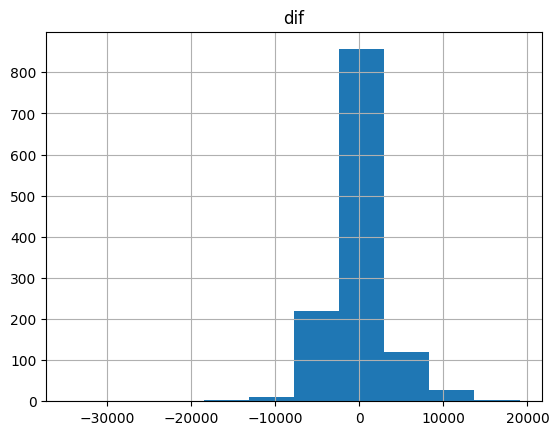

In [646]:
df_bmw_resultados.hist("dif")